In [1]:
from atom import ATOMClassifier
from atom.feature_engineering import FeatureSelector
from sklearn.linear_model import LogisticRegression
import sys
import os
from pathlib import Path
import pandas as pd
import joblib
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
import func_classes

In [2]:
# Get the working directory
input_path = Path.cwd()
root = input_path.parent
data_path = root / "data" / "dev_set_final.csv"
train_df = pd.read_csv(data_path, header=0)
test_df = pd.read_csv(root / "data" / "eval_set_final.csv", header=0)

Processing fold: 0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.



<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 12)
Train set size: 264
Test set size: 65
-------------------------------------
Memory: 31.72 kB
Scaled: False
Outlier values: 30 (0.9%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.9537
Time elapsed: 0.217s
-------------------------------------------------
Time: 0.217s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9886
Test evaluation --> fbeta_score: 0.9379
Time elapsed: 0.012s
-------------------------------------------------
Time: 0.012s


Results for LogisticRegression:
Fit ---------------------------------------------
Train evalua

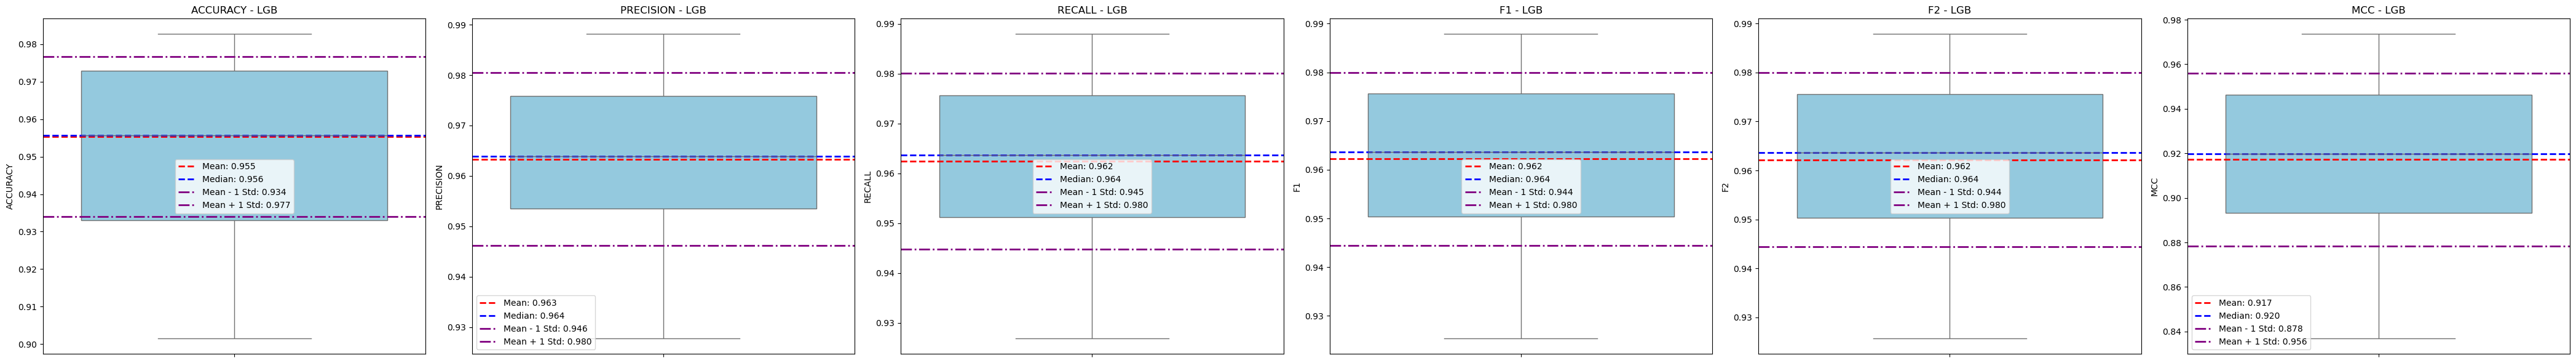

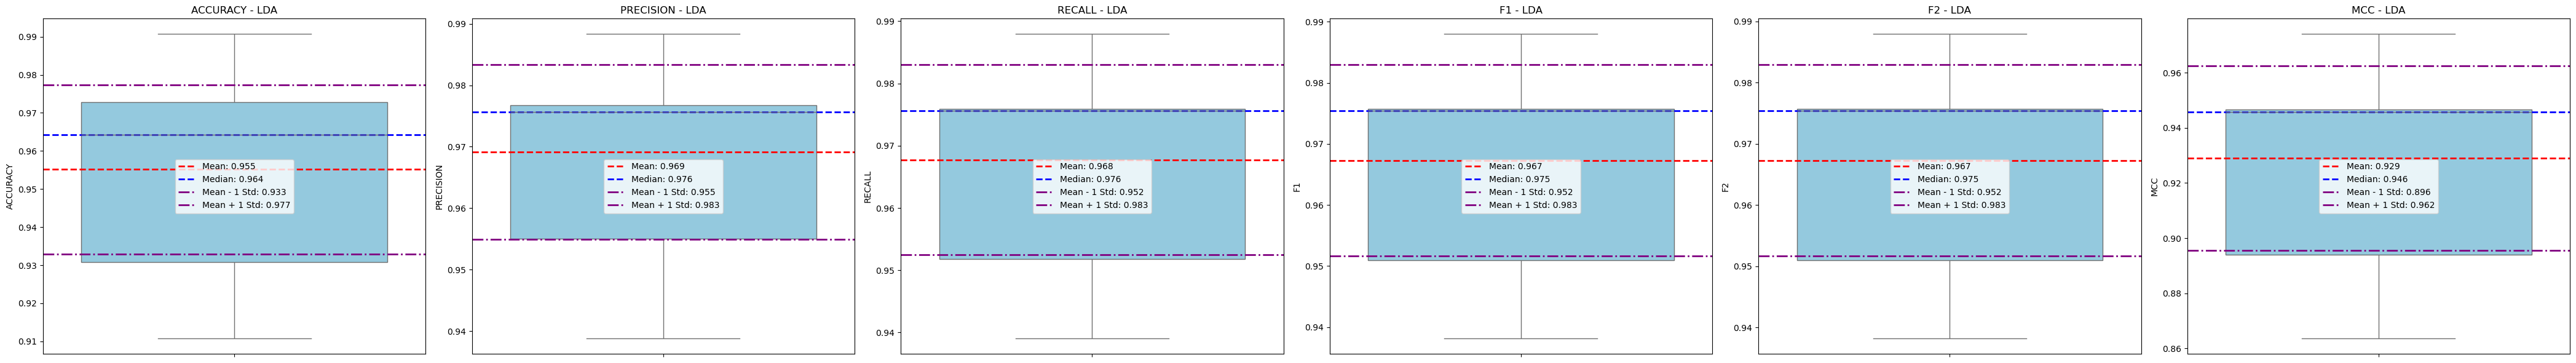

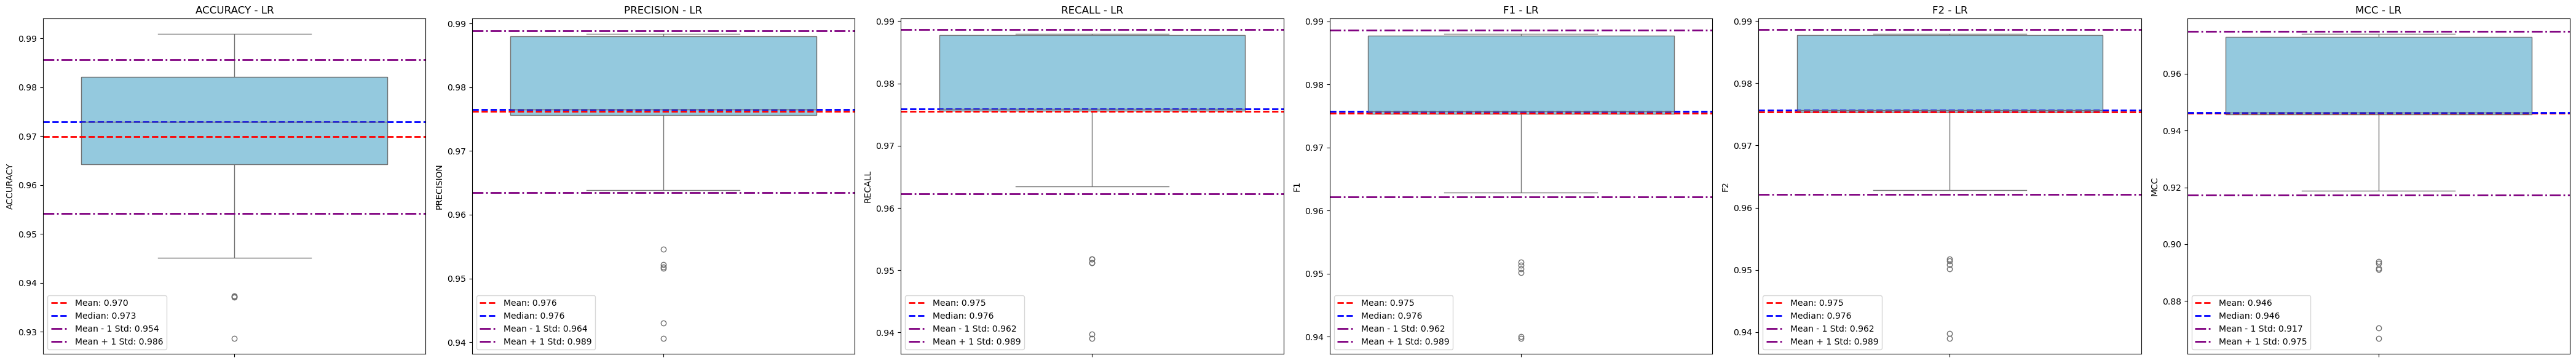

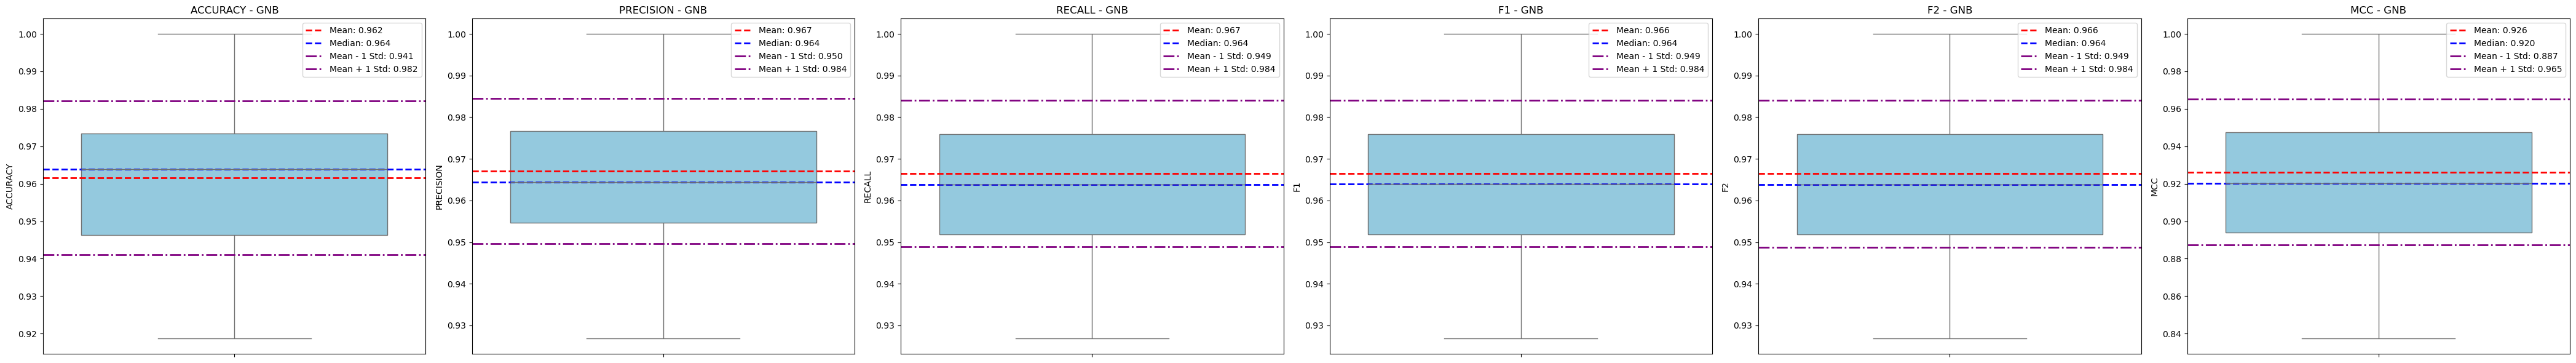

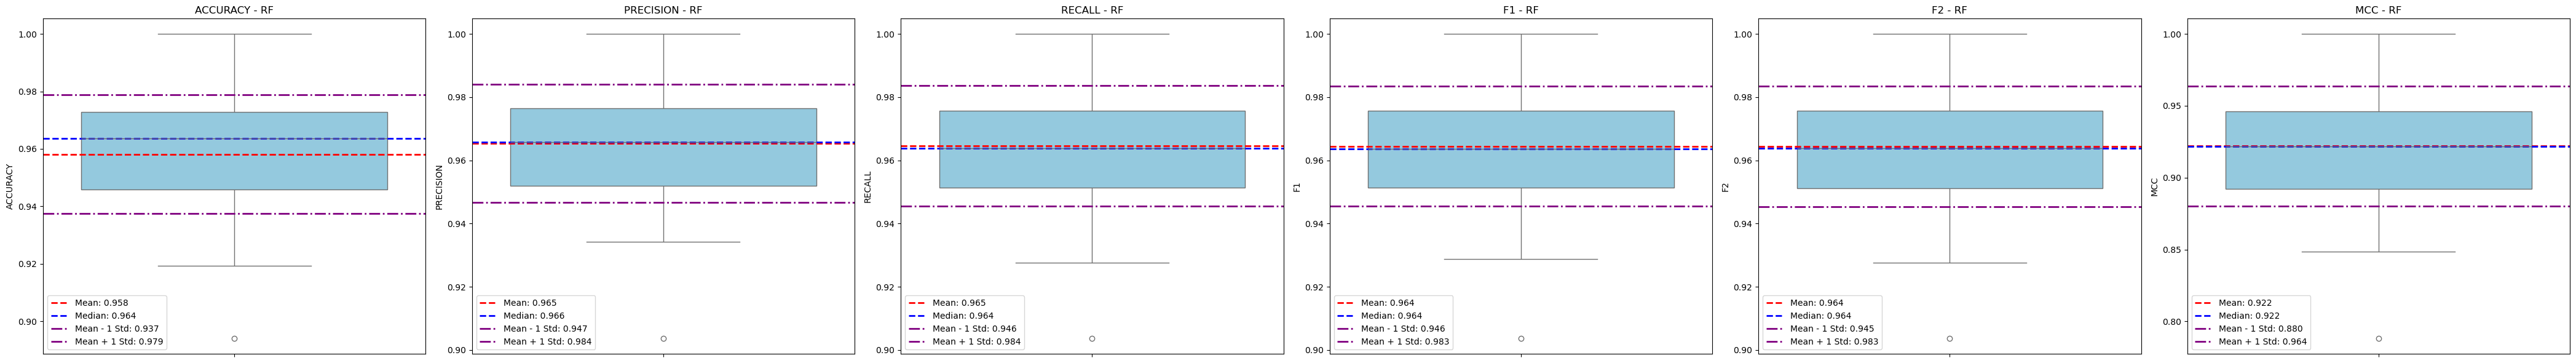

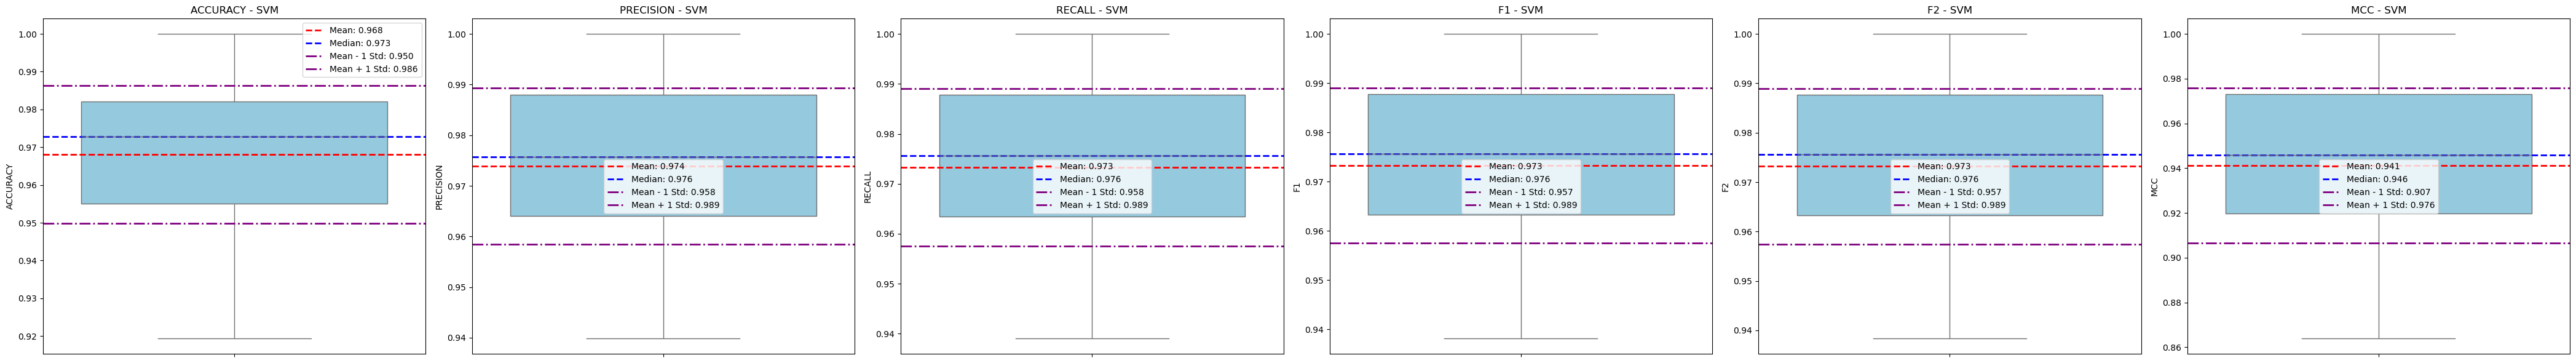

In [3]:
utils = func_classes.Utils()
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"],
    fs=True,
    fs_method=FeatureSelector(strategy="pso", solver='GNB_class')
)
rncv.baseline_run()
results = rncv.get_baseline_results()
inner_cv_results = rncv.get_best_from_inner_cv()
results.to_csv(root/'data'/'results_PSO.csv', index=False)
inner_cv_results.to_csv(root/'data'/'inner_cv_results_PSO.csv', index=False)

# Get the best model from the inner CV results
utils.get_best_from_folds(results=root/'data'/'inner_cv_results_PSO.csv')

# Define the metrics you want to visualize
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create boxplots for each model
for model in ["LGB", "LDA", "LR", "GNB", "RF", "SVM"]:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (412, 12)
Train set size: 330
Test set size: 82
-------------------------------------
Memory: 39.68 kB
Scaled: False
Outlier values: 40 (1.0%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.9509
Time elapsed: 0.224s
-------------------------------------------------
Time: 0.224s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9755
Test evaluation --> fbeta_score: 0.9629
Time elapsed: 0.014s
-------------------------------------------------
Time: 0.014s


Results for LogisticRegression:
Fit ---------------------------------------------
Train evalua

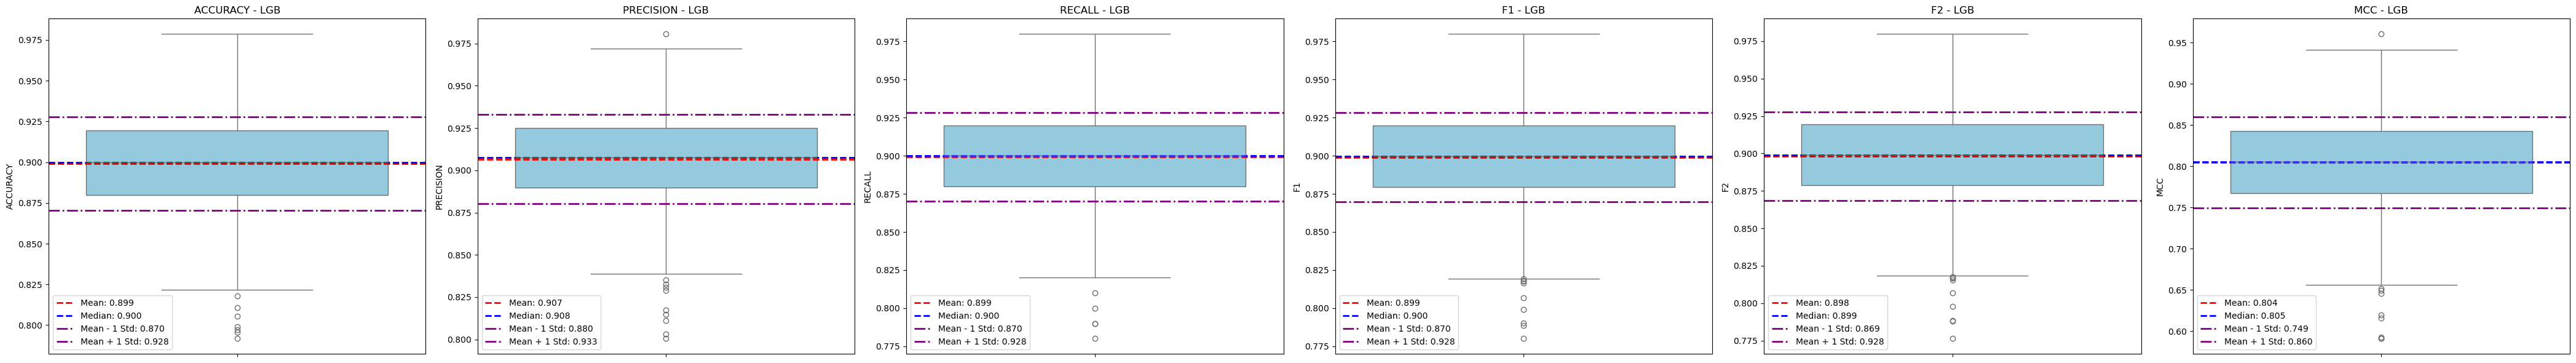

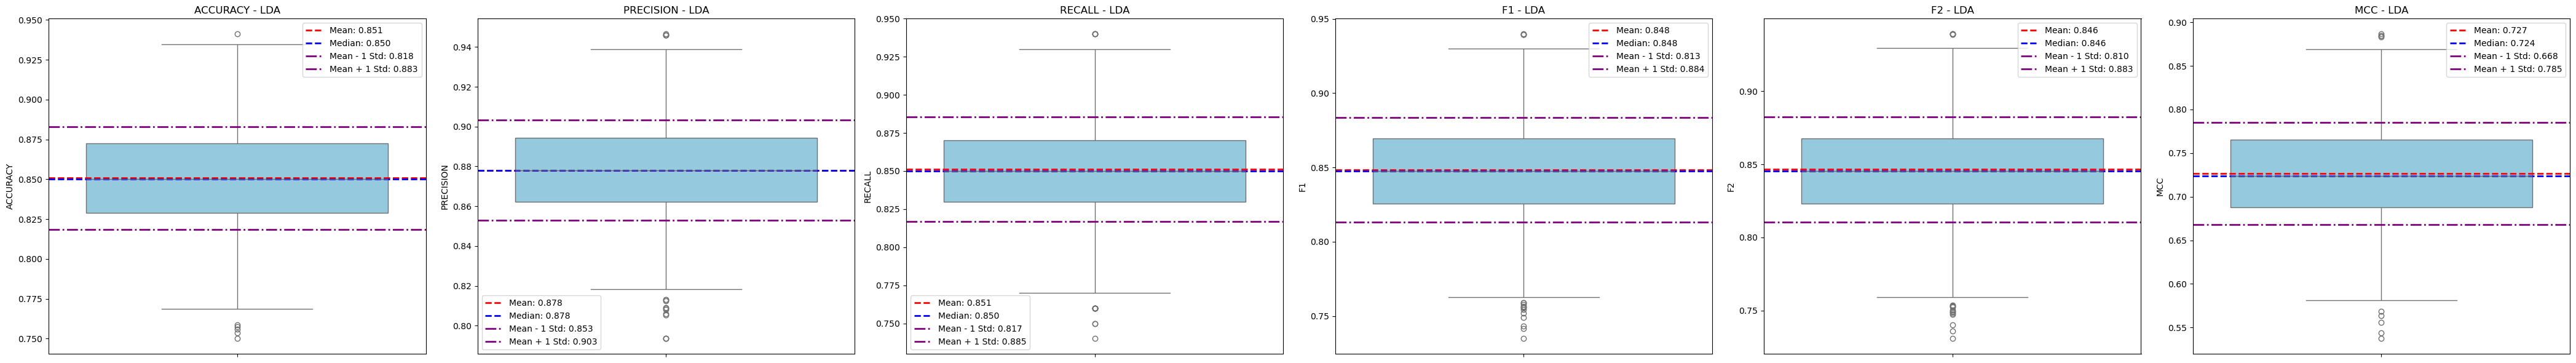

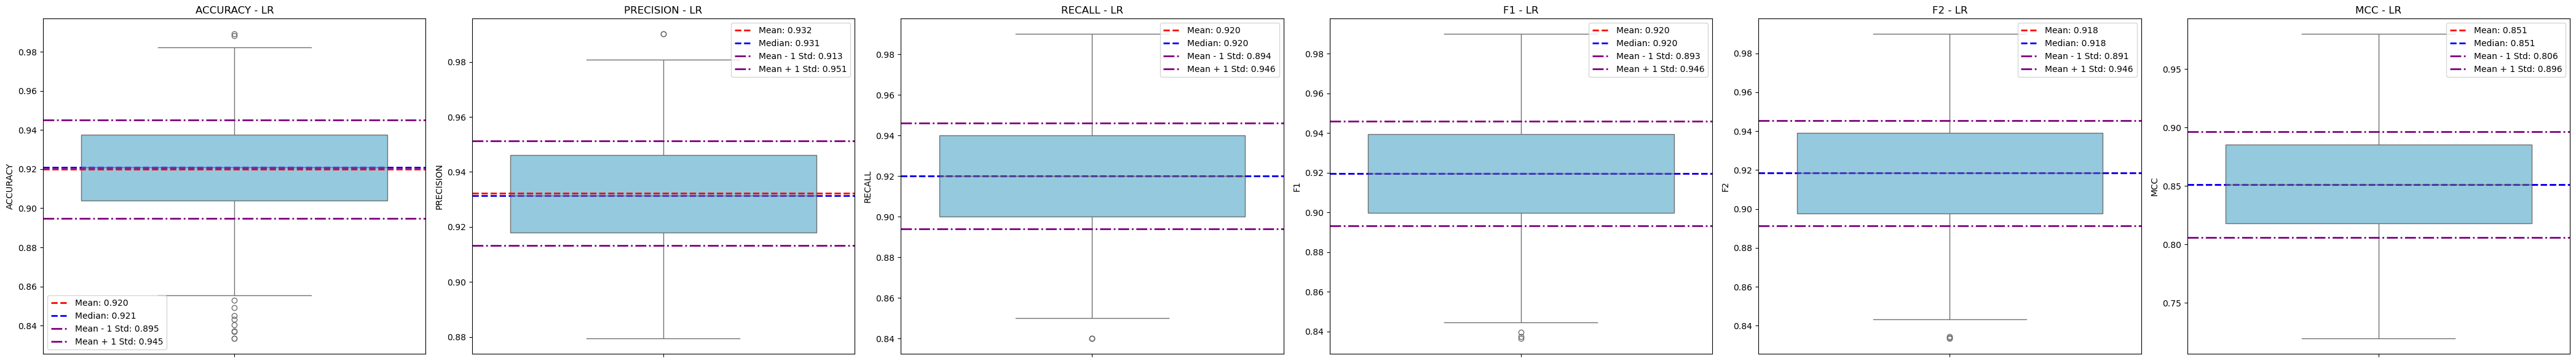

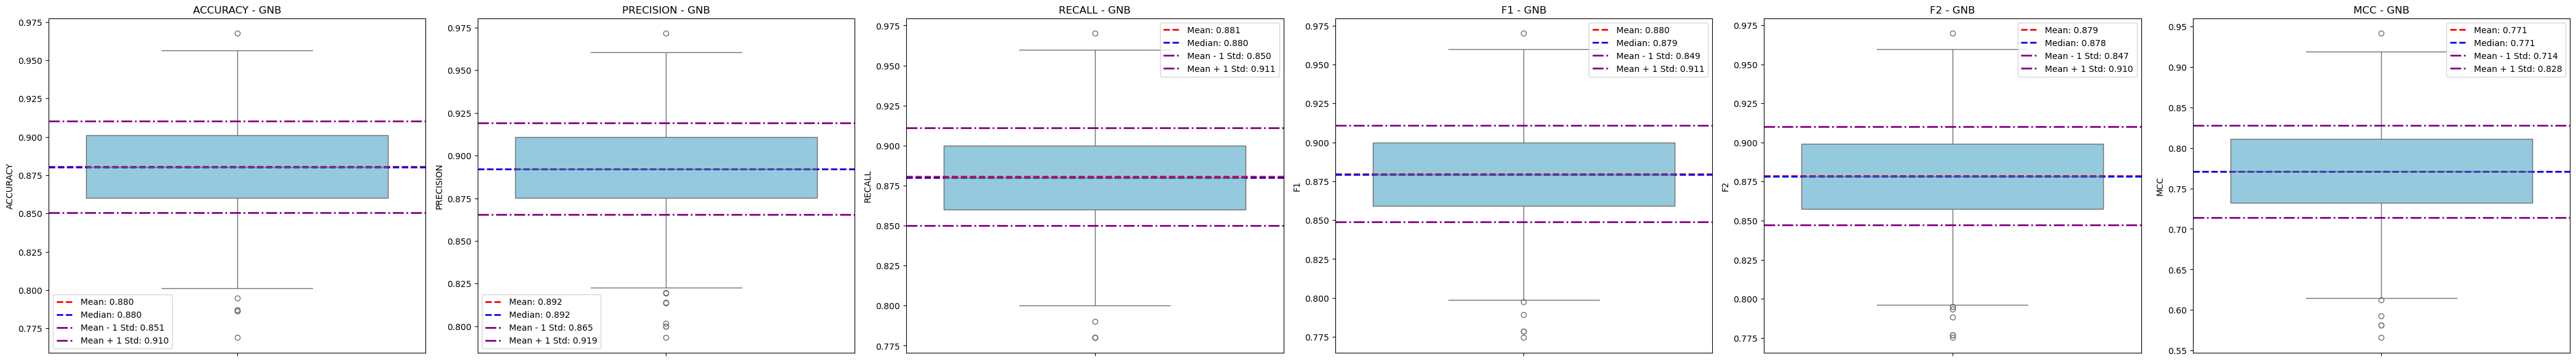

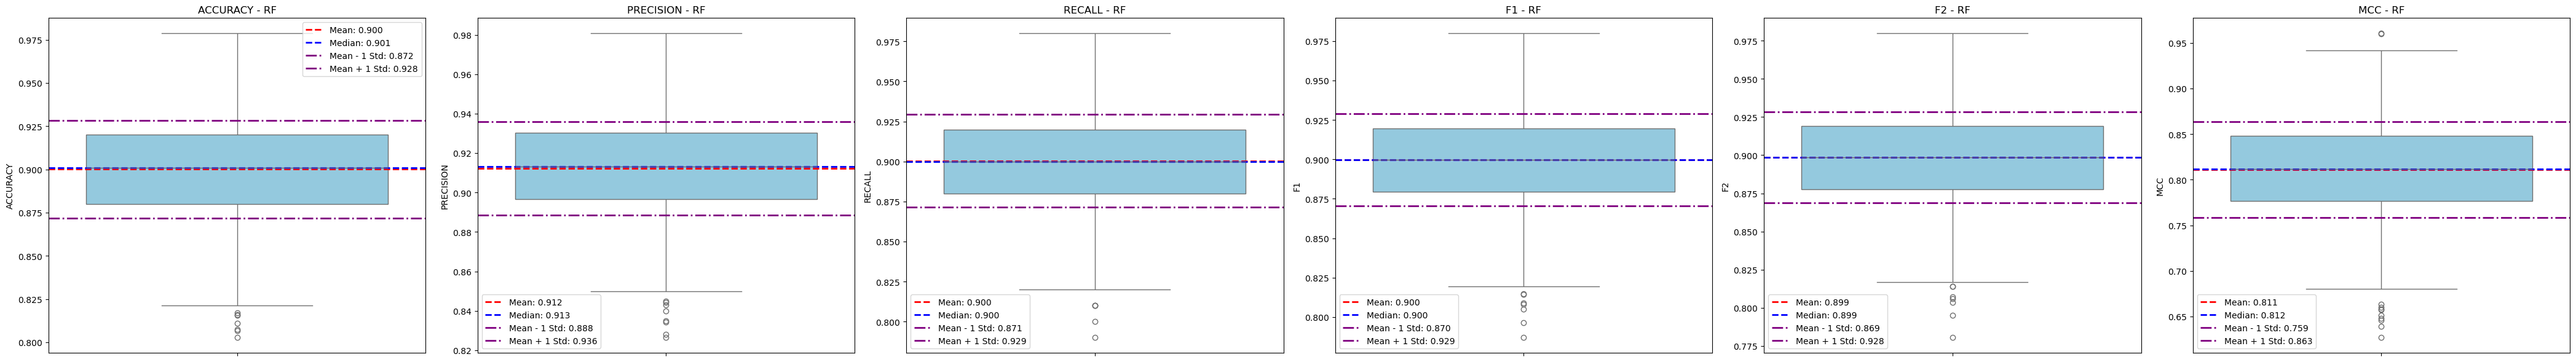

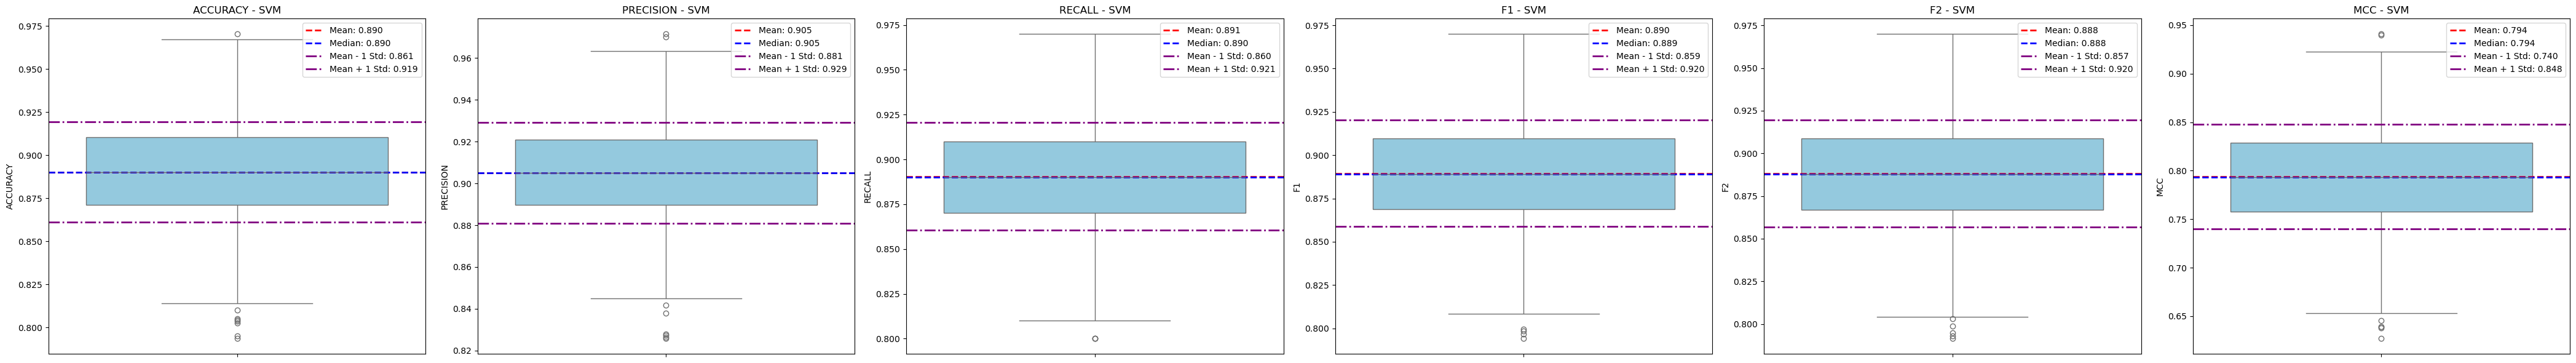

In [4]:
models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"]
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]
utils = func_classes.Utils()
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"],
    fs=True,
    fs_method=FeatureSelector(strategy="pso", solver='GNB_class')
)
rncv.bootstrap(train_set=train_df, eval_set=test_df)
results = rncv.get_bootstrap_results()
results.to_csv(root/'data'/'bootstrap_results_Pso.csv', index=False)

utils = func_classes.Utils()
for model in models:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )

Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 14)
Train set size: 264
Test set size: 65
-------------------------------------
Memory: 36.98 kB
Scaled: False
Outlier values: 36 (1.0%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Running hyperparameter tuning for LogisticRegression...
| trial | penalty |       C |  solver | max_iter | l1_ratio | fbeta_score | best_fbeta_score | time_trial | time_ht |    state |
| ----- | ------- | ------- | ------- | -------- | -------- | ----------- | ---------------- | ---------- | ------- | -------- |
| 0     |      l1 |   0.006 | libli.. |      110 |      1.0 |      0.5973 |           0.5973 |     0.041s |  0.041s | COMPLETE |
| 1     |    None |  0.0332 |     sag |      360 |      0.4 |      0.9924 |           0.9924 |     0.058s |  0.099s | COMPLETE |
| 2     |      l1 | 

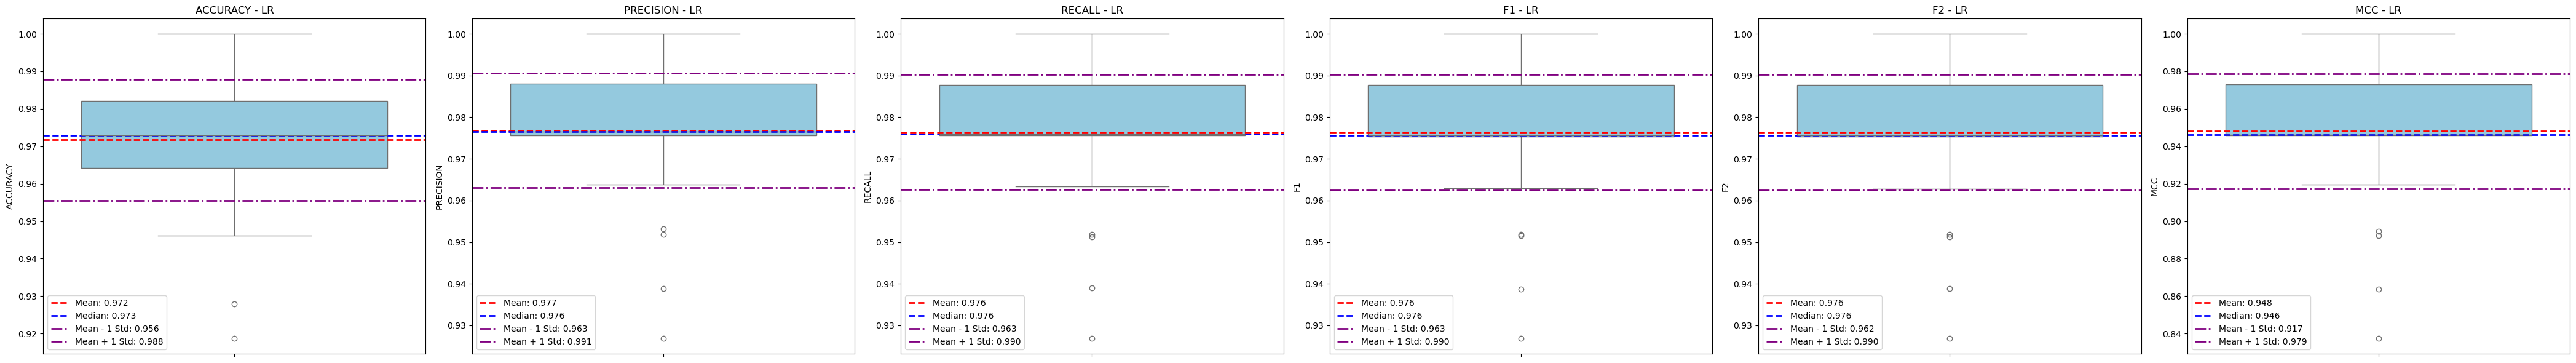

In [5]:
# Define the models you want to evaluate
models = ['LR']

# Define the metrics you want to evaluate
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create a new RNcvAtom instance
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models=models,
    fs=True,
    fs_method=FeatureSelector(strategy="pso", solver="GNB_class"),
)

rncv.fine_tune(model=['LR'])
best_results = rncv.get_best_model_results()
best_results.to_csv(root/'data'/'best_model_results_PSO.csv', index=False)
utils = func_classes.Utils()
for model in models:
    utils.create_boxplot(
        df=best_results,
        model_name=model,
        metrics=metrics
    )


 Analyzing: model
model
LR    50
Name: count, dtype: int64

 Analyzing: fold


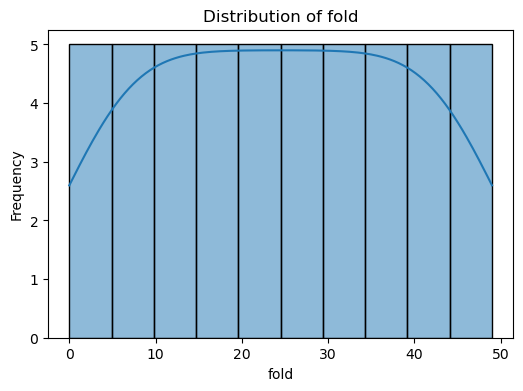


 Analyzing: accuracy


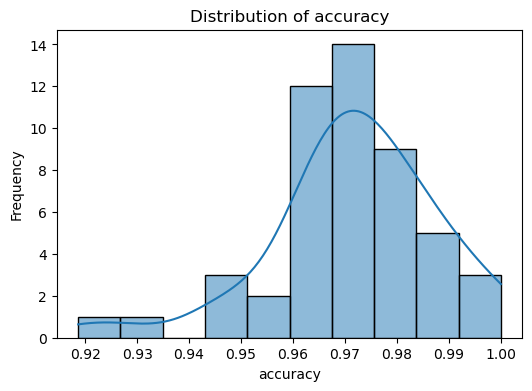


 Analyzing: precision


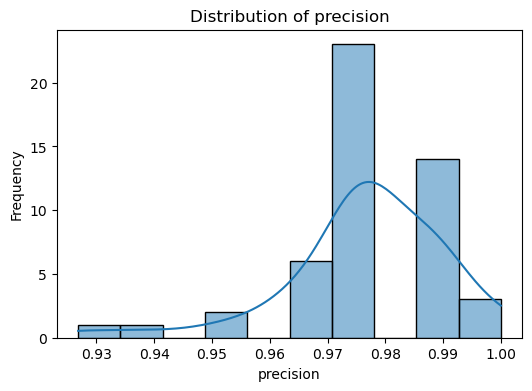


 Analyzing: recall


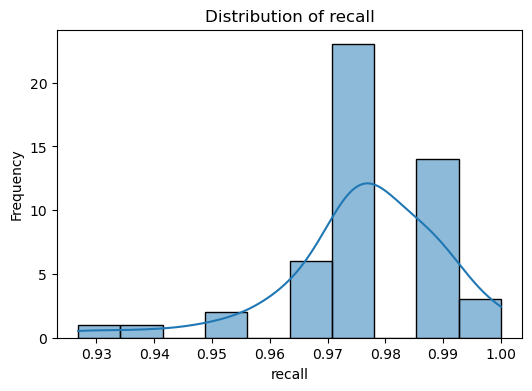


 Analyzing: f1


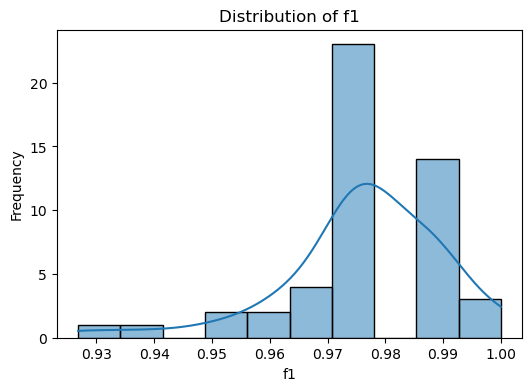


 Analyzing: f2


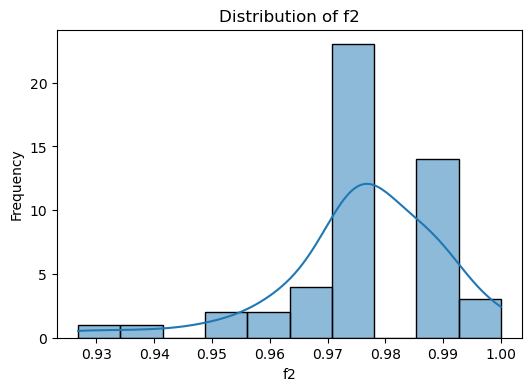


 Analyzing: mcc


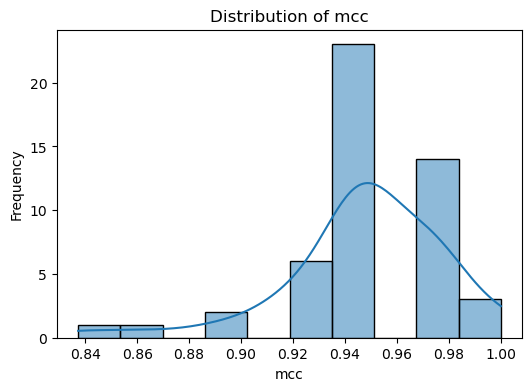


 Analyzing: C


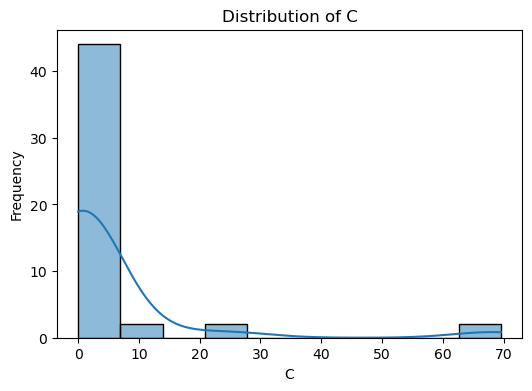


 Analyzing: class_weight
Series([], Name: count, dtype: int64)

 Analyzing: dual


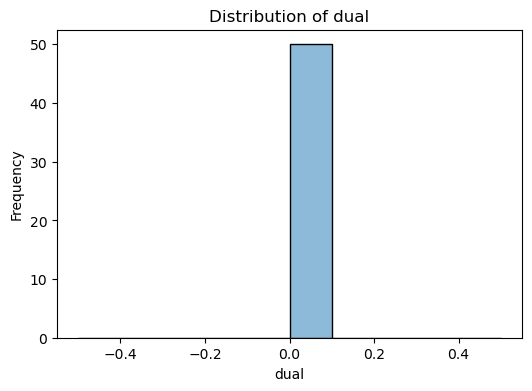


 Analyzing: fit_intercept


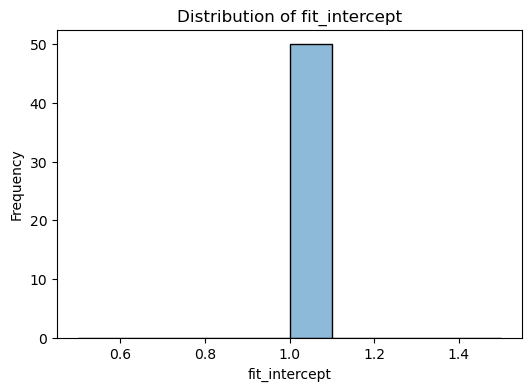


 Analyzing: intercept_scaling


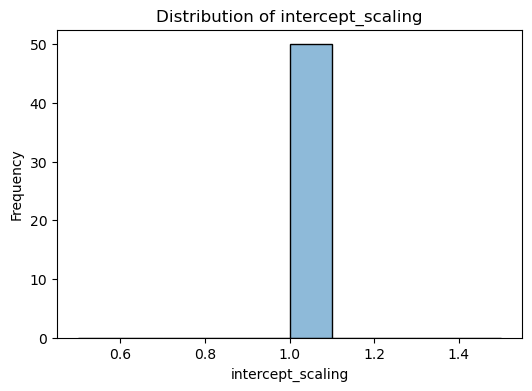


 Analyzing: l1_ratio


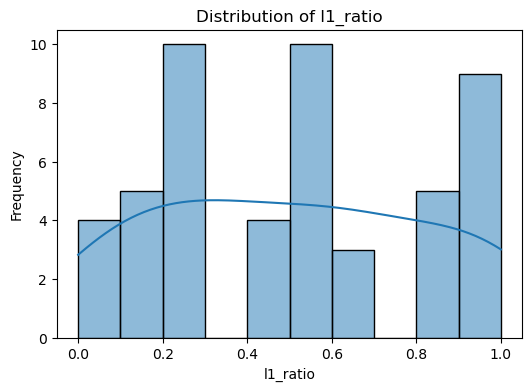


 Analyzing: max_iter


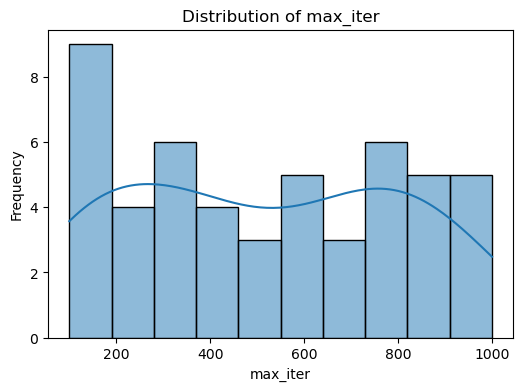


 Analyzing: multi_class
multi_class
deprecated    50
Name: count, dtype: int64

 Analyzing: n_jobs


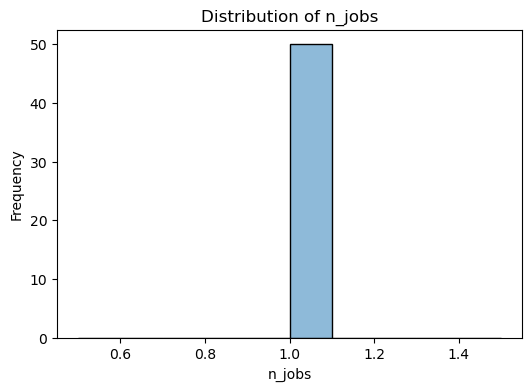


 Analyzing: penalty
penalty
l2            41
l1             6
elasticnet     2
Name: count, dtype: int64

 Analyzing: random_state


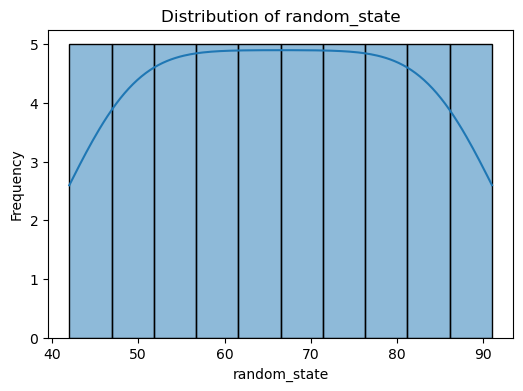


 Analyzing: solver
solver
liblinear    30
saga          6
newton-cg     5
lbfgs         5
sag           4
Name: count, dtype: int64

 Analyzing: tol


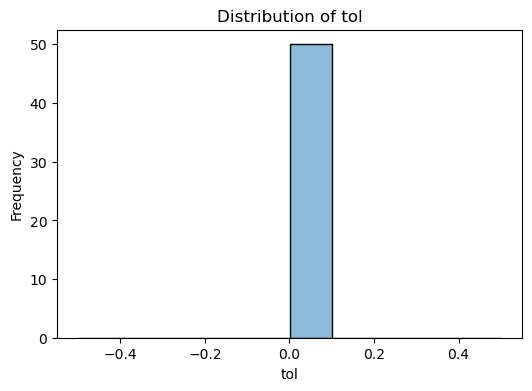


 Analyzing: verbose


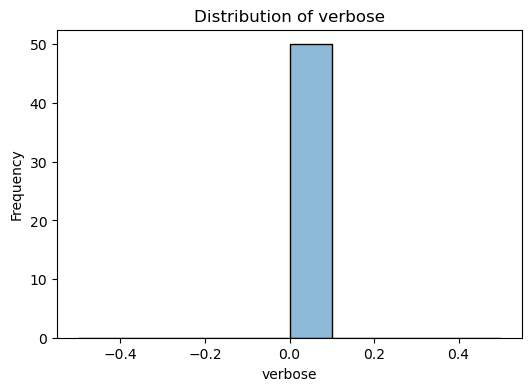


 Analyzing: warm_start


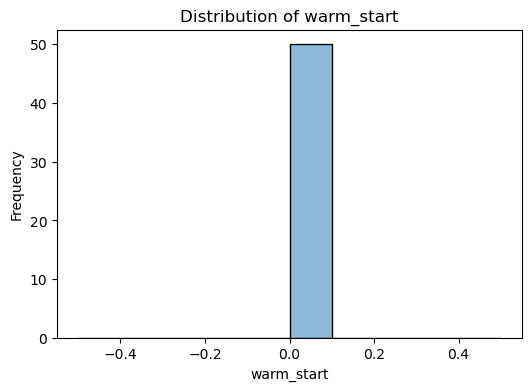

In [6]:
optuna_res = pd.read_csv(root/'data'/'best_model_results_PSO.csv', header=0)
utils = func_classes.Utils()
full_df = utils.process_optuna_results(optuna_res)
utils.plot_optuna_results(full_df)

Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 13)
Train set size: 264
Test set size: 65
-------------------------------------
Memory: 34.35 kB
Scaled: False
Outlier values: 35 (1.0%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9962
Test evaluation --> fbeta_score: 0.9232
Time elapsed: 0.012s
-------------------------------------------------
Time: 0.012s


Final results ==================== >>
Total time: 0.014s
-------------------------------------
LogisticRegression --> fbeta_score: 0.9232
Processing fold: 1
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 12)
Tra

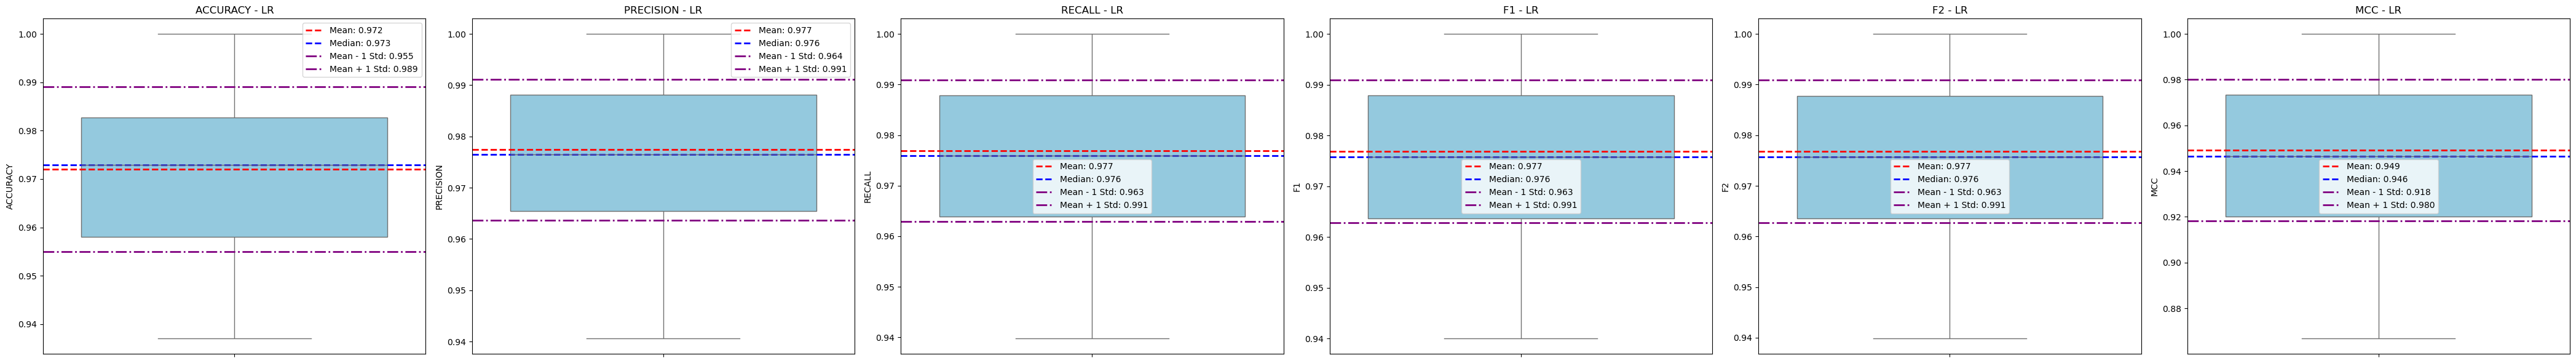

In [7]:
model = [LogisticRegression(C=1.0, penalty='l2', solver='liblinear')]
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=['diagnosis']), 
    y=train_df['diagnosis'], 
    models=model, 
    fs=True,
    fs_method=FeatureSelector(strategy="pso", solver='GNB_class')
    )
rncv.baseline_run(model_inst=model)
final_model_results = rncv.get_baseline_results()
utils = func_classes.Utils()
utils.create_boxplot(
    df=final_model_results, 
    model_name="LR", 
    metrics=["accuracy", "precision", "recall", "f1", "f2", "mcc"]
)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (412, 11)
Train set size: 330
Test set size: 82
-------------------------------------
Memory: 36.39 kB
Scaled: False
Outlier values: 33 (0.9%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9848
Test evaluation --> fbeta_score: 0.9877
Time elapsed: 0.012s
-------------------------------------------------
Time: 0.012s


Final results ==================== >>
Total time: 0.014s
-------------------------------------
LogisticRegression --> fbeta_score: 0.9877


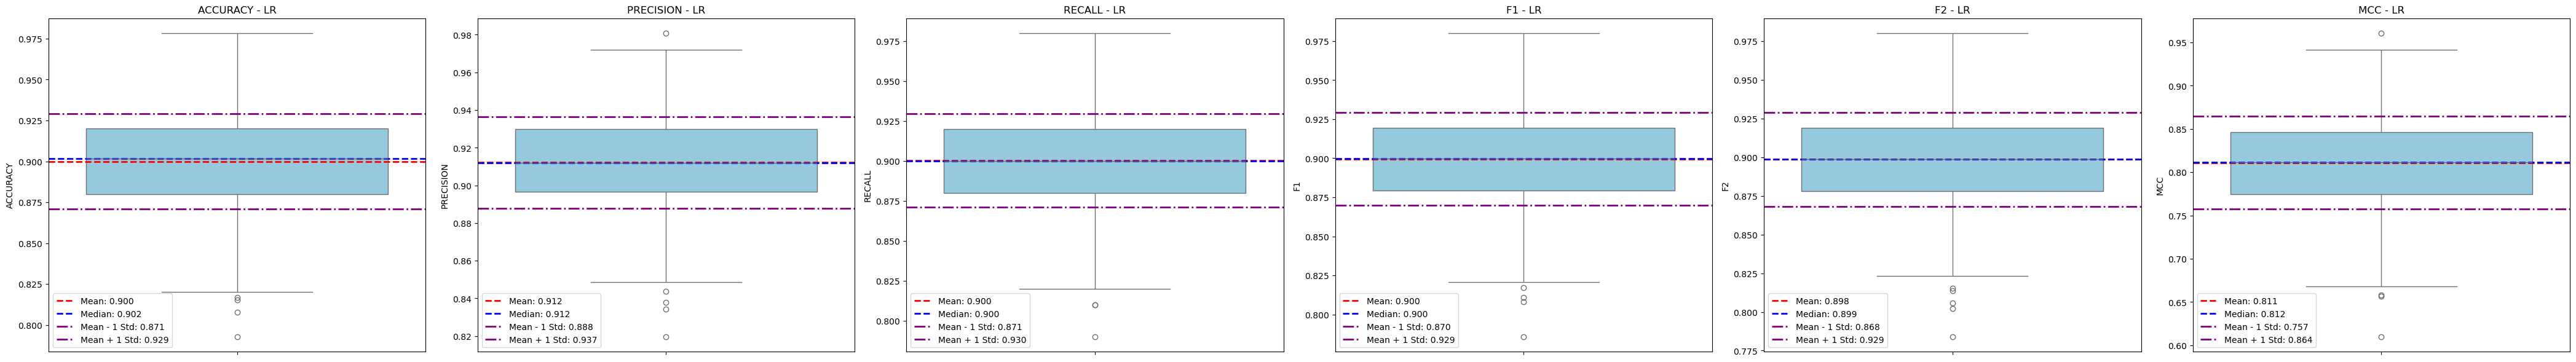

In [8]:
model = [LogisticRegression(C=1.0, penalty='l2', solver='liblinear')]
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=['diagnosis']), 
    y=train_df['diagnosis'], 
    models=model, 
    fs=True,
    fs_method=FeatureSelector(strategy="pso", solver="GNB_class"),
    )
rncv.bootstrap(
    train_set=train_df,
    eval_set=test_df,
    model_inst=model,
)
boot_df = rncv.get_bootstrap_results()
utils = func_classes.Utils()
utils.create_boxplot(
    df=boot_df,
    model_name="LR",
    metrics=["accuracy", "precision", "recall", "f1", "f2", "mcc"]
)

<hr>

Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 31)
Train set size: 264
Test set size: 65
-------------------------------------
Memory: 81.72 kB
Scaled: False
Outlier values: 104 (1.3%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.9379
Time elapsed: 0.283s
-------------------------------------------------
Time: 0.283s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9771
Test evaluation --> fbeta_score: 0.9529
Time elapsed: 0.014s
-------------------------------------------------
Time: 0.014s


Results for LogisticRegression:
Fit --------------------------------------

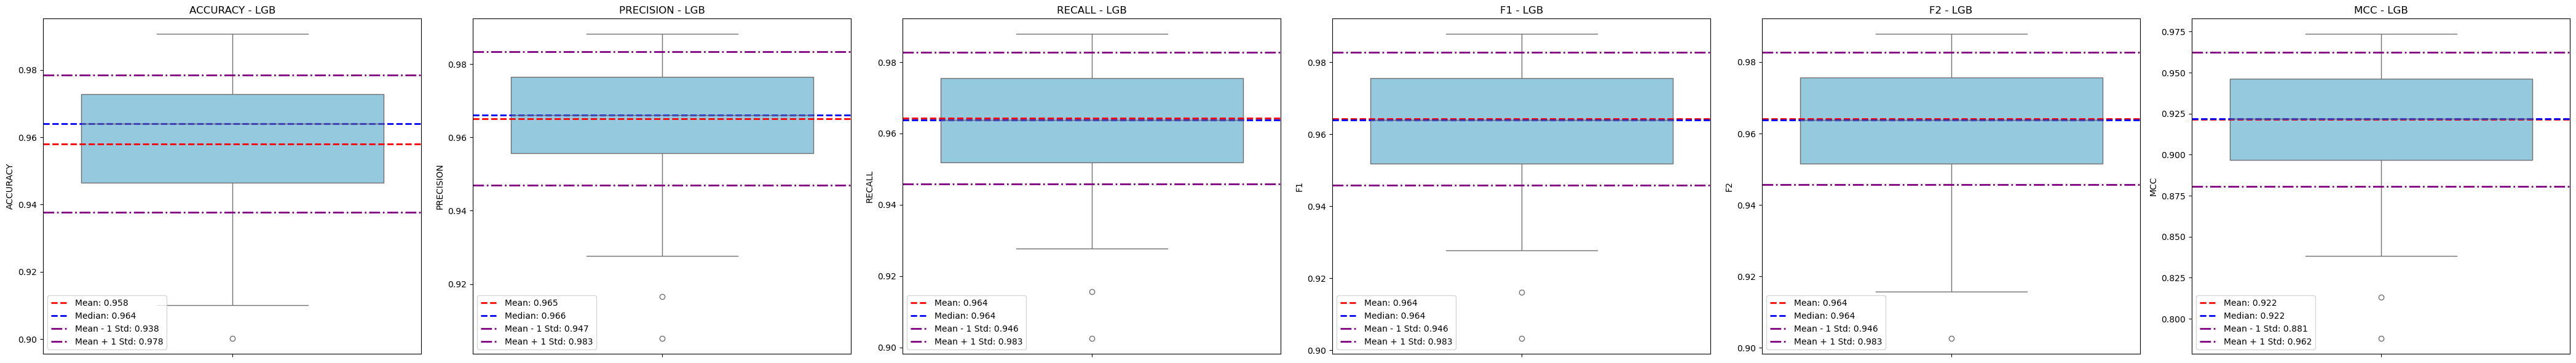

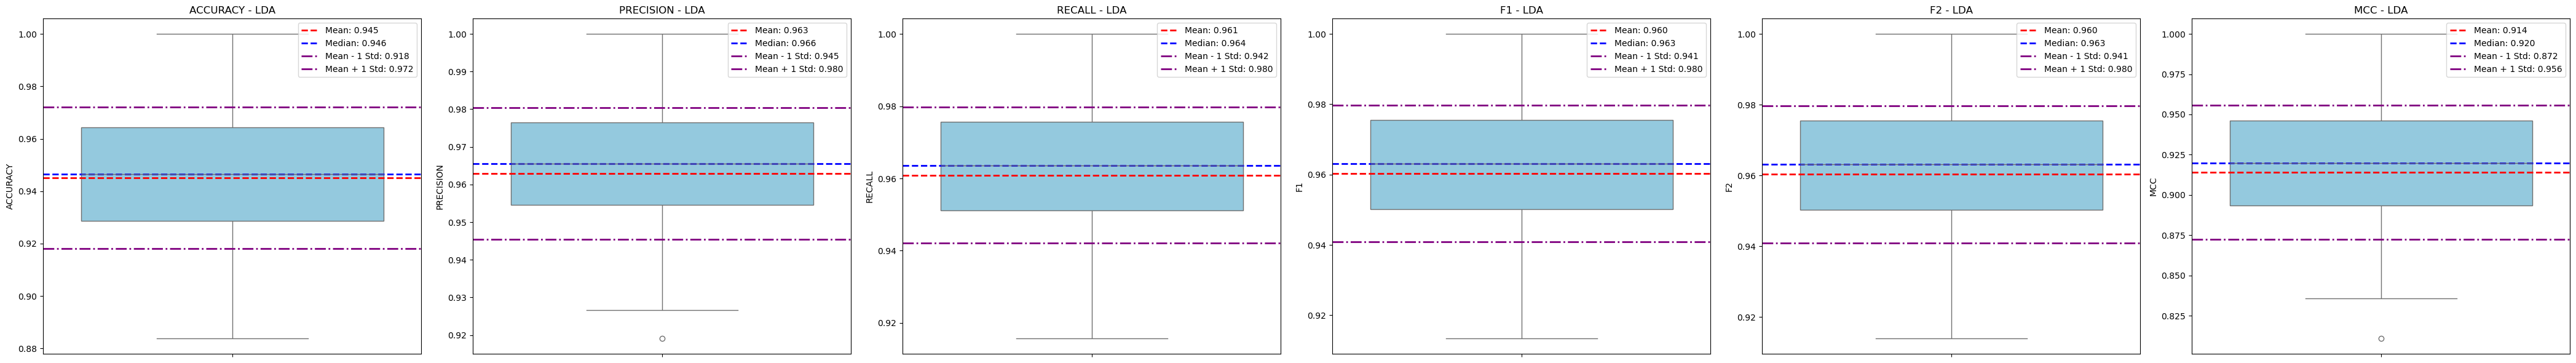

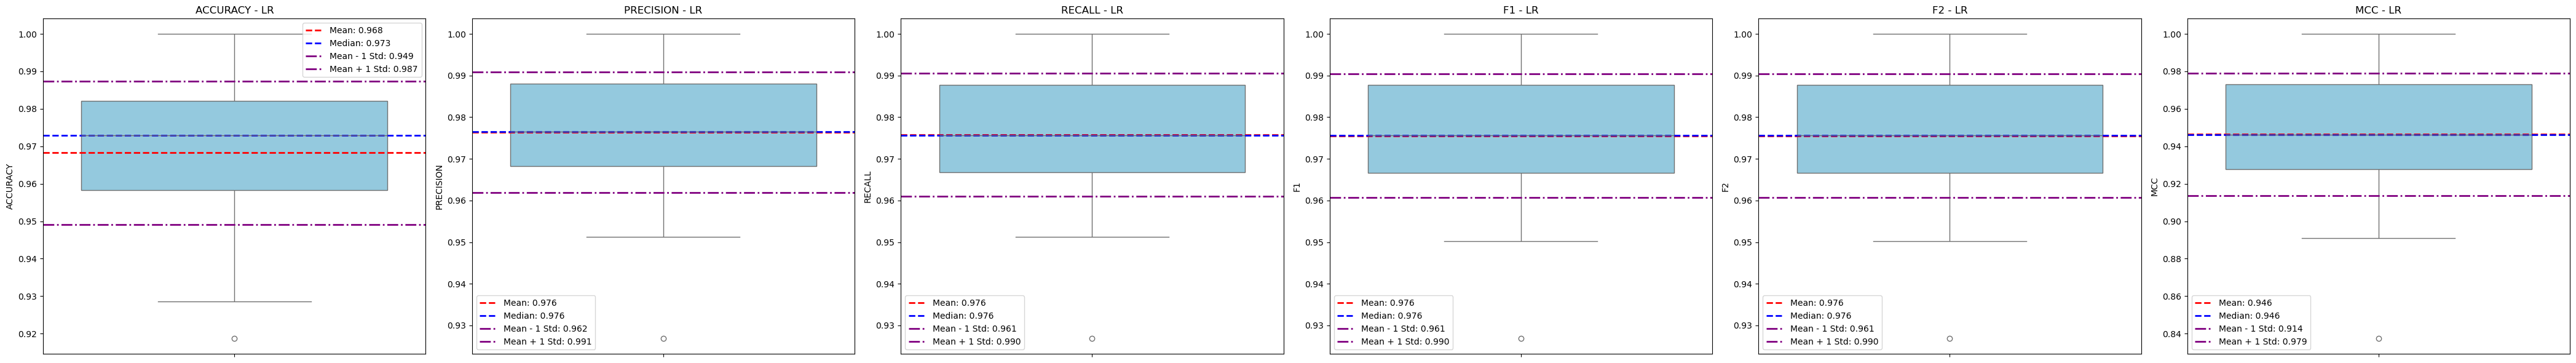

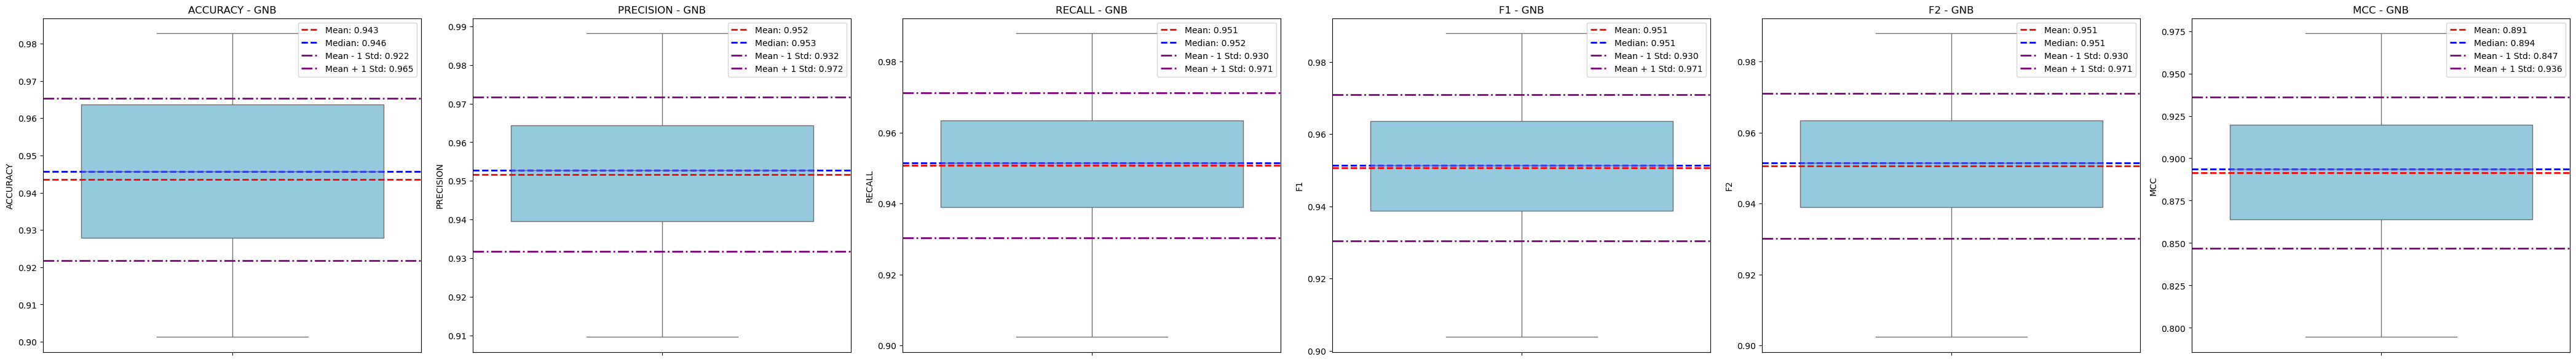

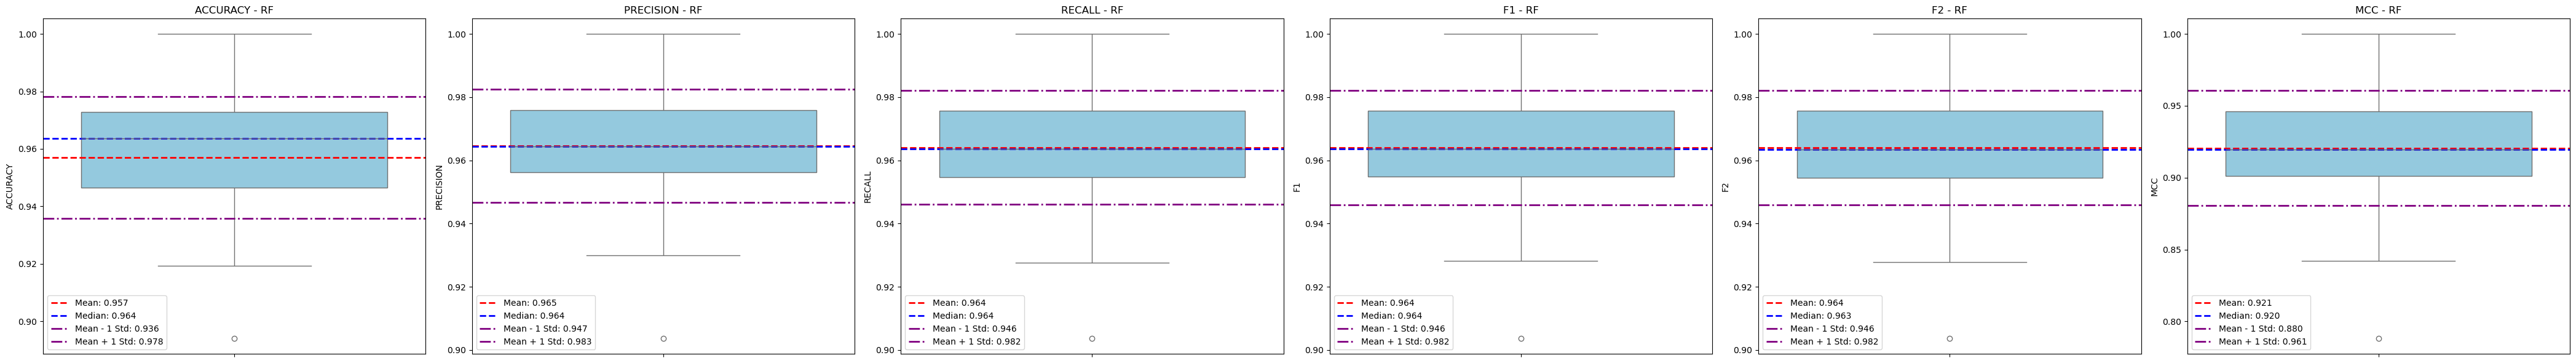

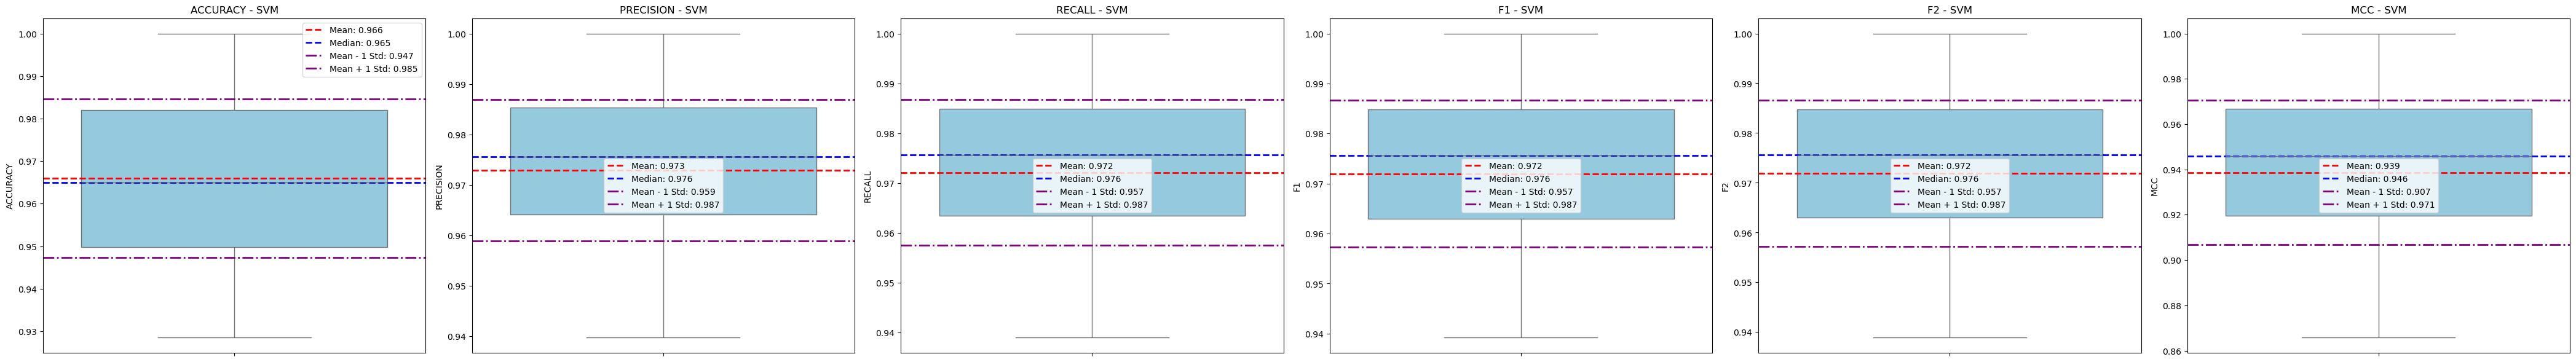

In [9]:
utils = func_classes.Utils()
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"],
    fs=True,
    fs_method=FeatureSelector(strategy="gwo", solver='GNB_class')
)
rncv.baseline_run()
results = rncv.get_baseline_results()
inner_cv_results = rncv.get_best_from_inner_cv()
results.to_csv(root/'data'/'results_GWO.csv', index=False)
inner_cv_results.to_csv(root/'data'/'inner_cv_results_GWO.csv', index=False)

# Get the best model from the inner CV results
utils.get_best_from_folds(results=root/'data'/'inner_cv_results_GWO.csv')

# Define the metrics you want to visualize
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create boxplots for each model
for model in ["LGB", "LDA", "LR", "GNB", "RF", "SVM"]:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (412, 27)
Train set size: 330
Test set size: 82
-------------------------------------
Memory: 89.12 kB
Scaled: False
Outlier values: 107 (1.2%)


Training ========================= >>
Models: LGB, LDA, LR, GNB, RF, SVM
Metric: fbeta_score


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 1.0
Test evaluation --> fbeta_score: 0.9509
Time elapsed: 0.283s
-------------------------------------------------
Time: 0.283s


Results for LinearDiscriminantAnalysis:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9786
Test evaluation --> fbeta_score: 0.9245
Time elapsed: 0.025s
-------------------------------------------------
Time: 0.025s


Results for LogisticRegression:
Fit ---------------------------------------------
Train evalu

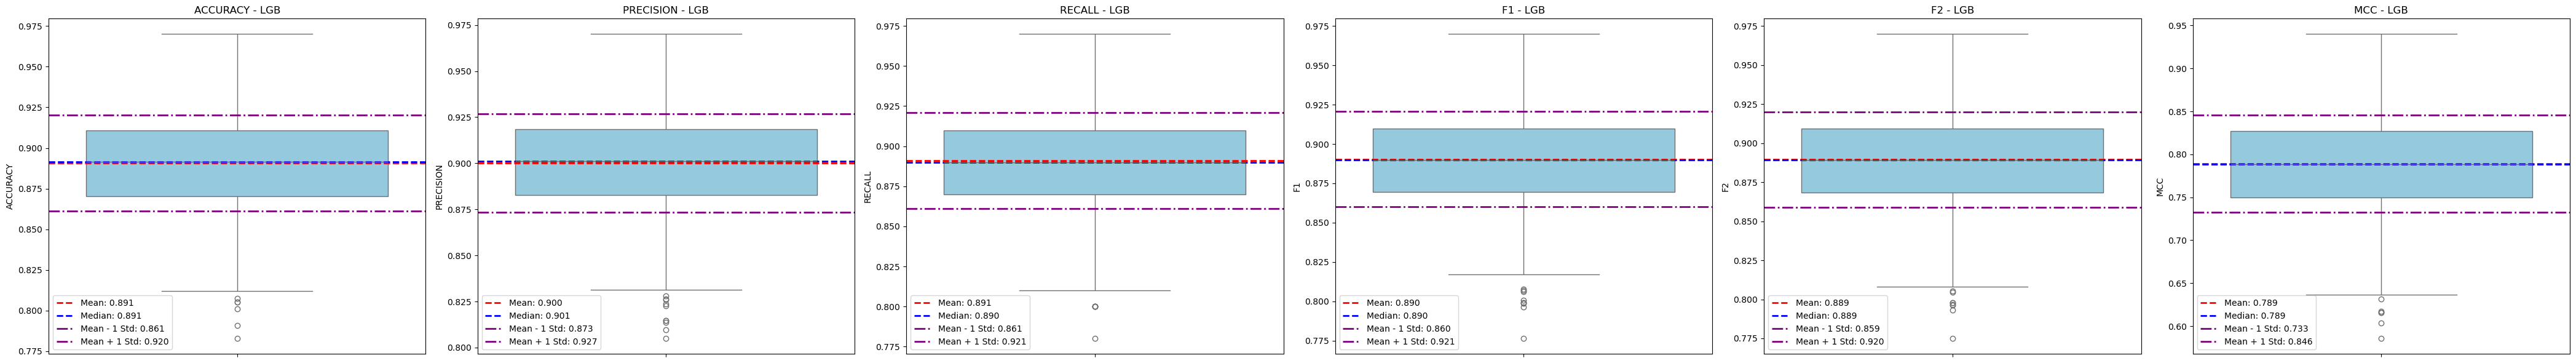

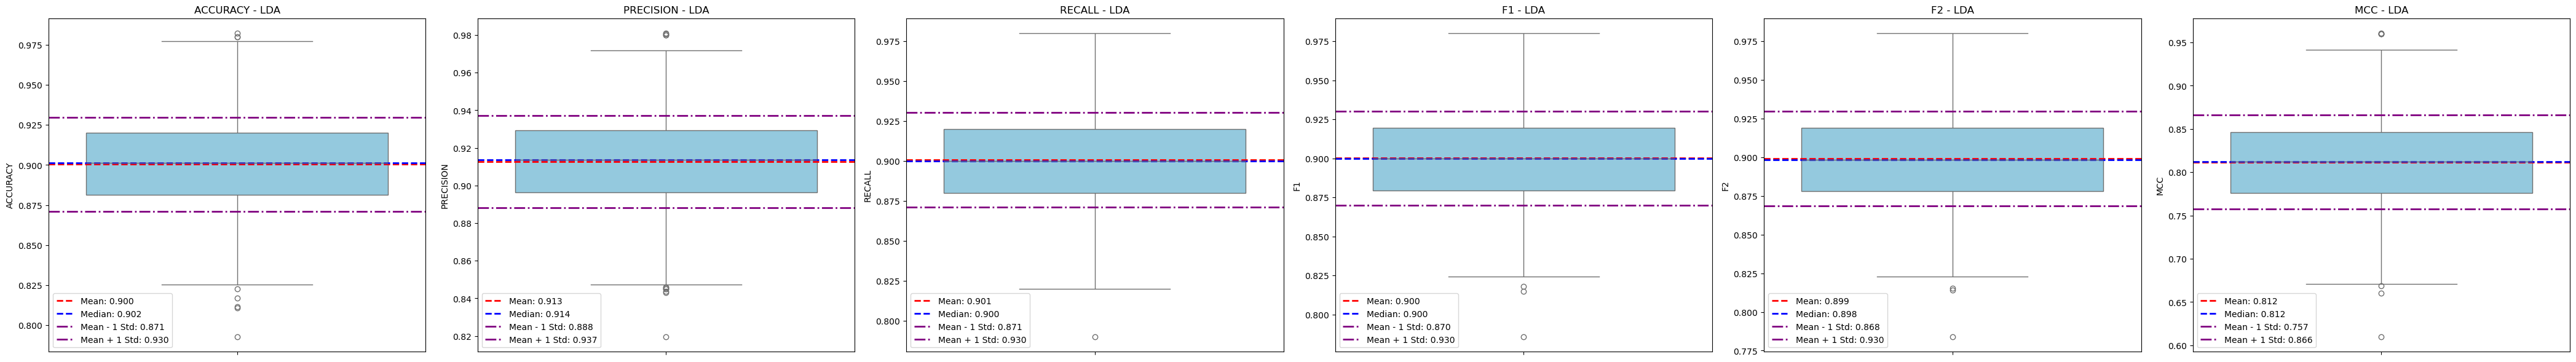

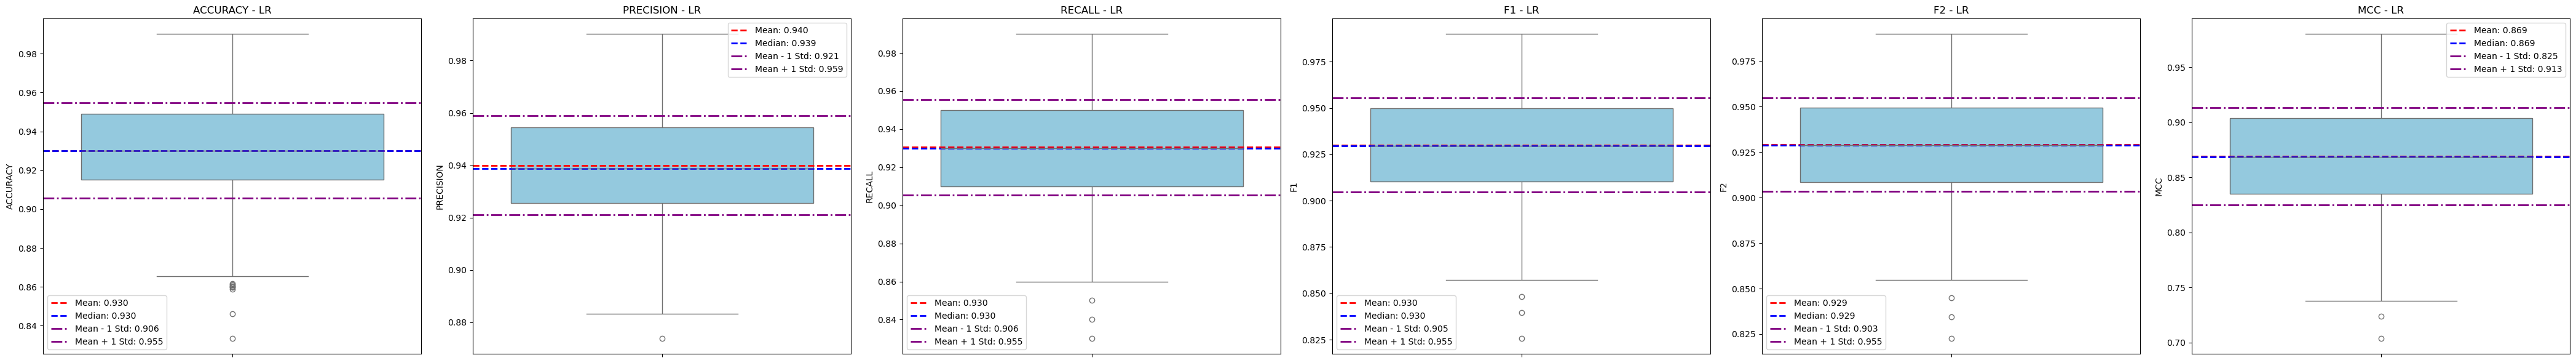

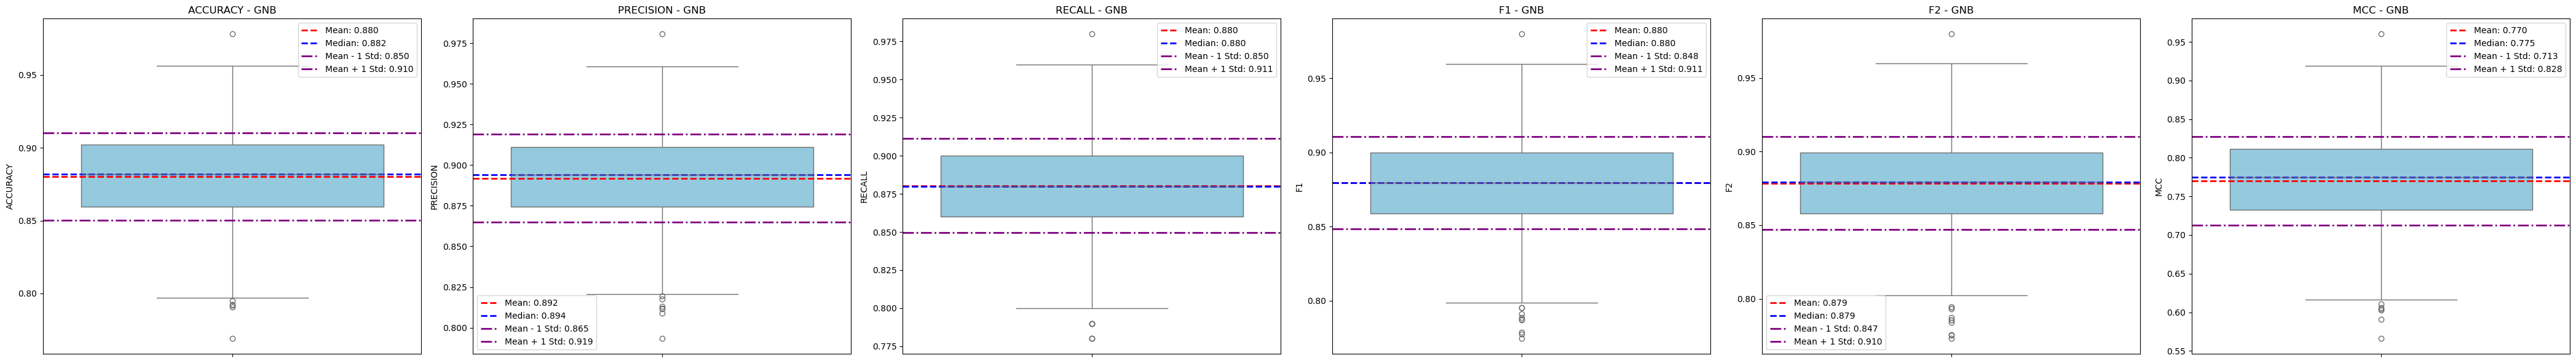

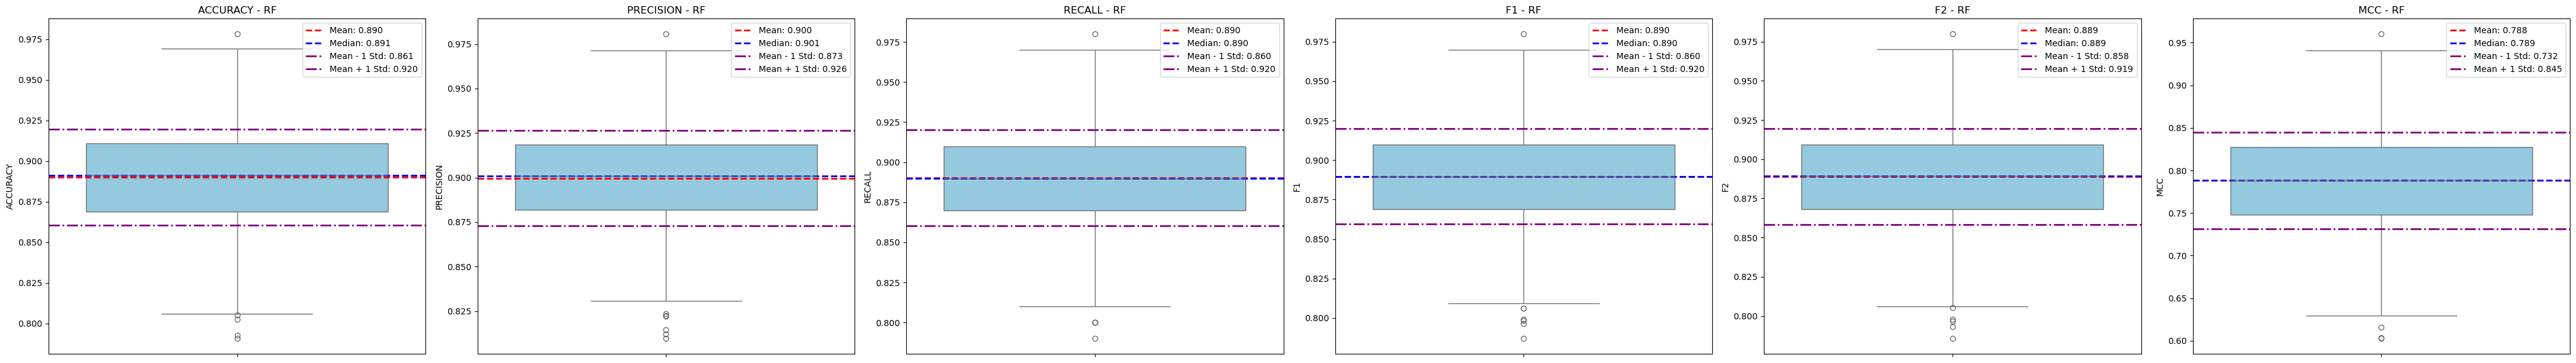

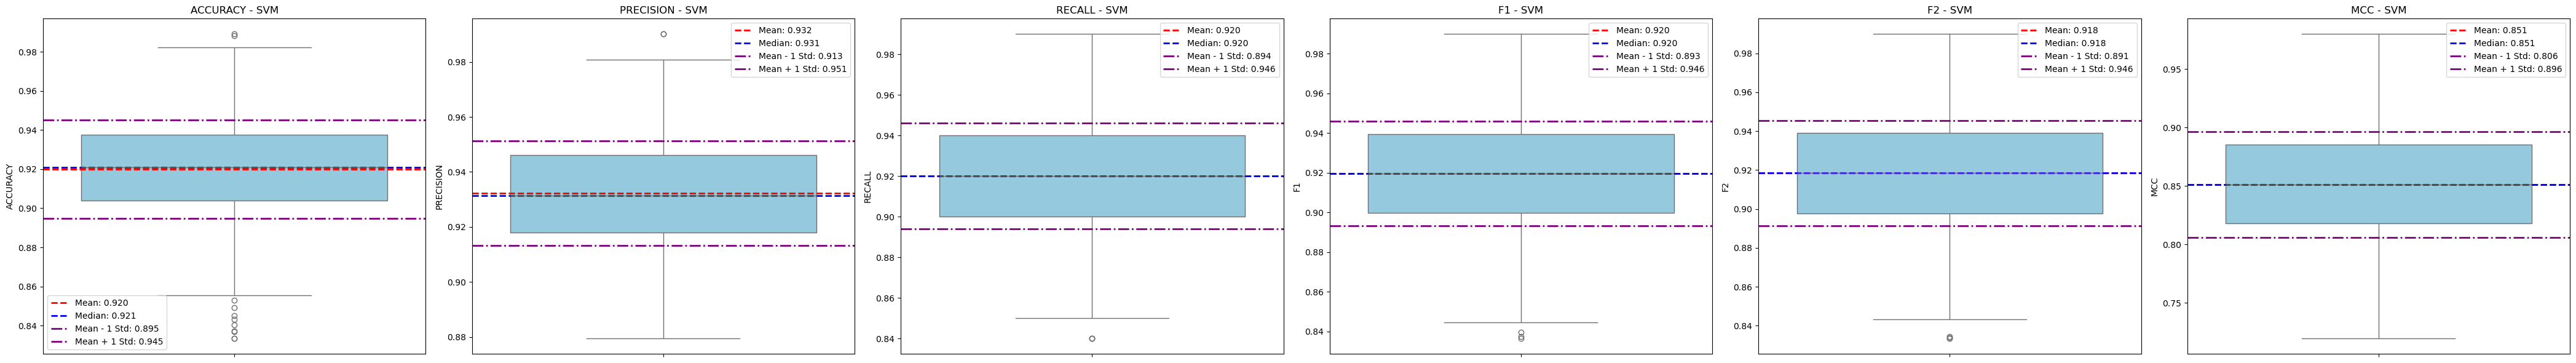

In [10]:
models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"]
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]
utils = func_classes.Utils()
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models = ["LGB", "LDA", "LR", "GNB", "RF", "SVM"],
    fs=True,
    fs_method=FeatureSelector(strategy="gwo", solver='GNB_class')
)
rncv.bootstrap(train_set=train_df, eval_set=test_df)
results = rncv.get_bootstrap_results()
results.to_csv(root/'data'/'bootstrap_results_GWO.csv', index=False)

utils = func_classes.Utils()
for model in models:
    utils.create_boxplot(
        df=results,
        model_name=model,
        metrics=metrics
    )

Processing fold: 0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning:

`BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning:

`BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.



<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 26)
Train set size: 264
Test set size: 65
-------------------------------------
Memory: 68.56 kB
Scaled: False
Outlier values: 89 (1.3%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Running hyperparameter tuning for LogisticRegression...
| trial | penalty |       C |  solver | max_iter | l1_ratio | fbeta_score | best_fbeta_score | time_trial | time_ht |    state |
| ----- | ------- | ------- | ------- | -------- | -------- | ----------- | ---------------- | ---------- | ------- | -------- |
| 0     |      l1 |   0.006 | libli.. |      110 |      1.0 |      0.5973 |           0.5973 |     0.054s |  0.054s | COMPLETE |
| 1     |    None |  0.0332 |     sag |      360 |      0.4 |      0.9734 |           0.9734 |     0.075s |  0.128s | COMPLETE |
| 2     |      l1 |  0.9164 |    saga |

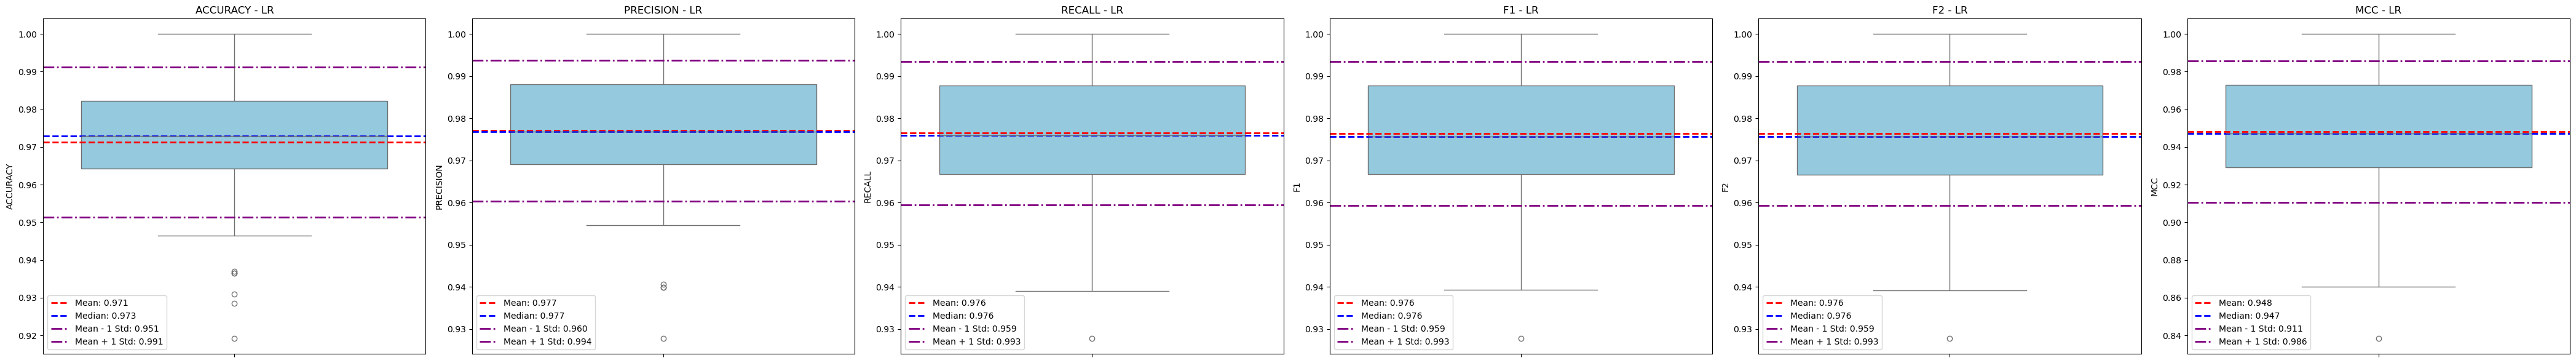

In [3]:
# Define the models you want to evaluate
models = ['LR']

# Define the metrics you want to evaluate
metrics = ["accuracy", "precision", "recall", "f1", "f2", "mcc"]

# Create a new RNcvAtom instance
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=["diagnosis"]),
    y=train_df["diagnosis"],
    models=models,
    fs=True,
    fs_method=FeatureSelector(strategy="gwo", solver="GNB_class"),
)

rncv.fine_tune(model=['LR'])
best_results = rncv.get_best_model_results()
best_results.to_csv(root/'data'/'best_model_results_GWO.csv', index=False)
utils = func_classes.Utils()
for model in models:
    utils.create_boxplot(
        df=best_results,
        model_name=model,
        metrics=metrics
    )


 Analyzing: model
model
LR    50
Name: count, dtype: int64

 Analyzing: fold


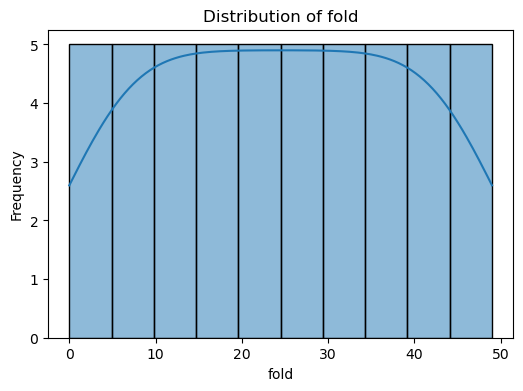


 Analyzing: accuracy


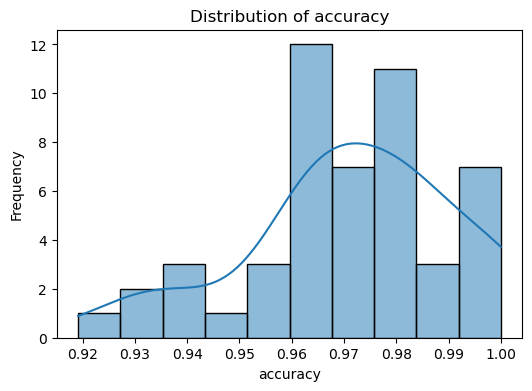


 Analyzing: precision


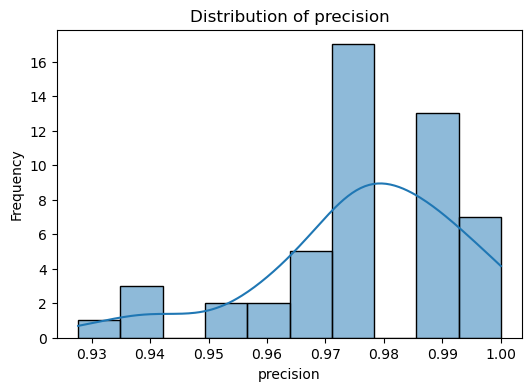


 Analyzing: recall


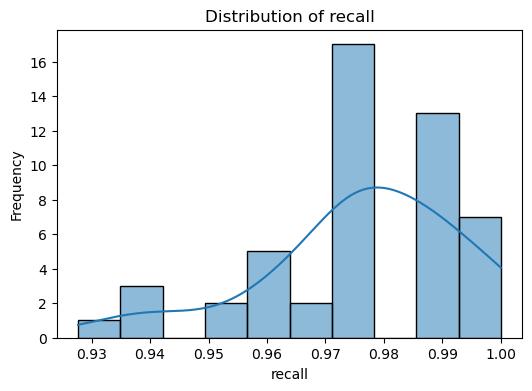


 Analyzing: f1


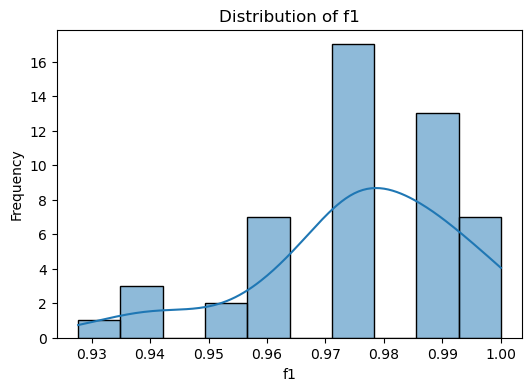


 Analyzing: f2


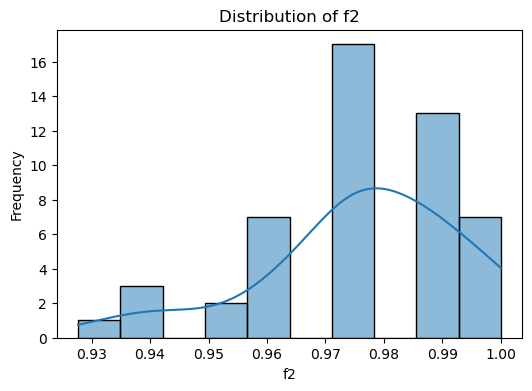


 Analyzing: mcc


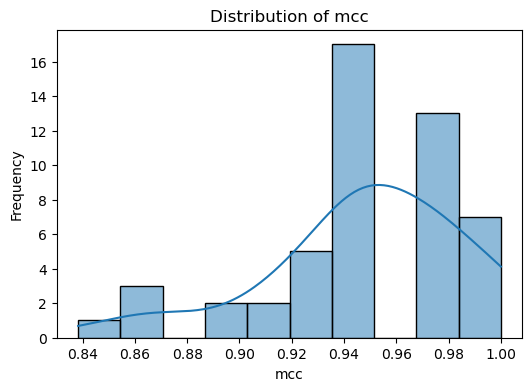


 Analyzing: C


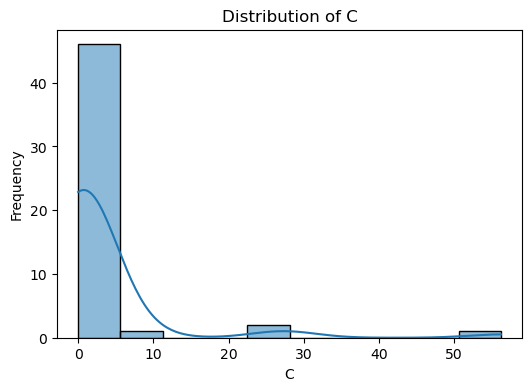


 Analyzing: class_weight
Series([], Name: count, dtype: int64)

 Analyzing: dual


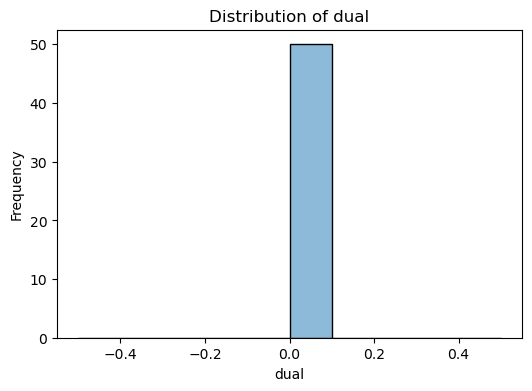


 Analyzing: fit_intercept


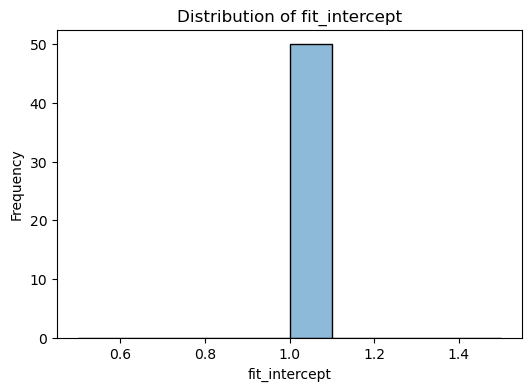


 Analyzing: intercept_scaling


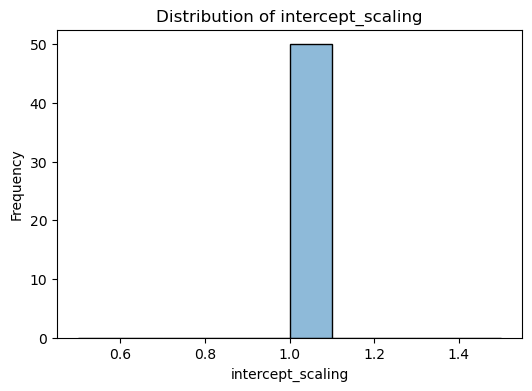


 Analyzing: l1_ratio


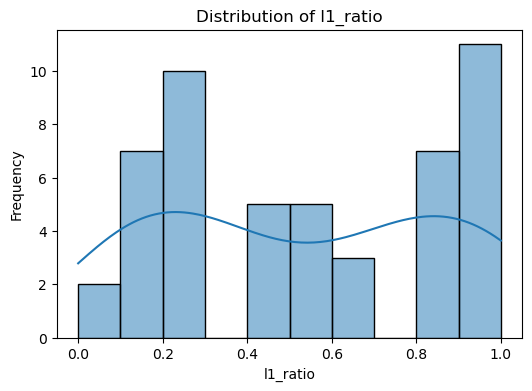


 Analyzing: max_iter


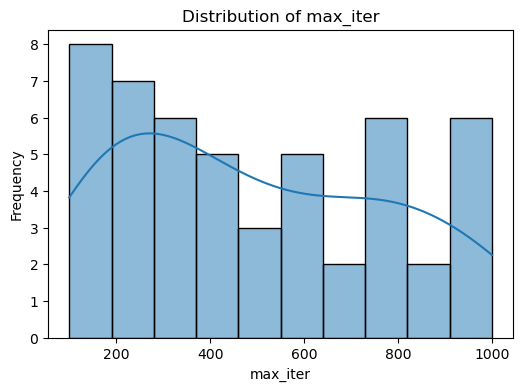


 Analyzing: multi_class
multi_class
deprecated    50
Name: count, dtype: int64

 Analyzing: n_jobs


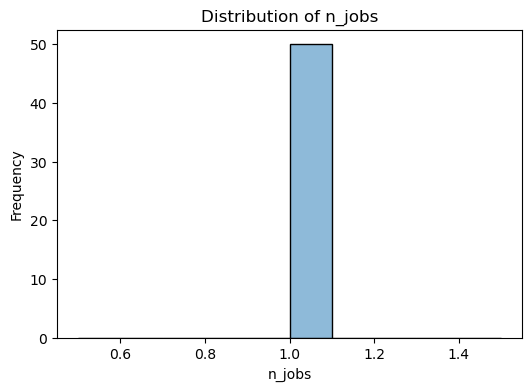


 Analyzing: penalty
penalty
l2            36
l1             7
elasticnet     5
Name: count, dtype: int64

 Analyzing: random_state


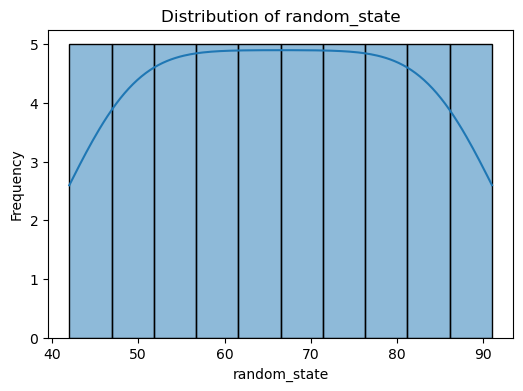


 Analyzing: solver
solver
liblinear    29
saga          7
lbfgs         5
sag           5
newton-cg     4
Name: count, dtype: int64

 Analyzing: tol


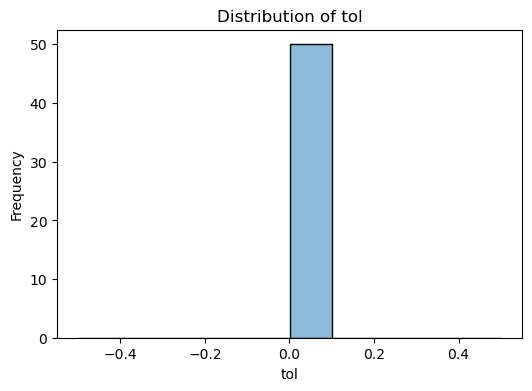


 Analyzing: verbose


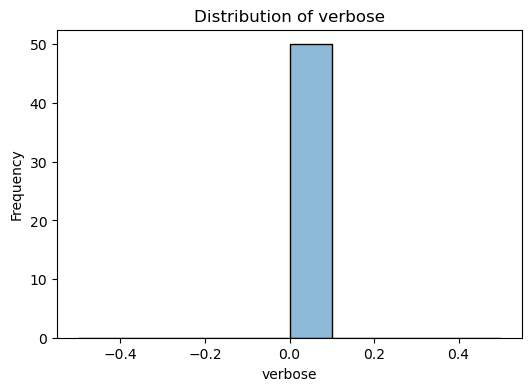


 Analyzing: warm_start


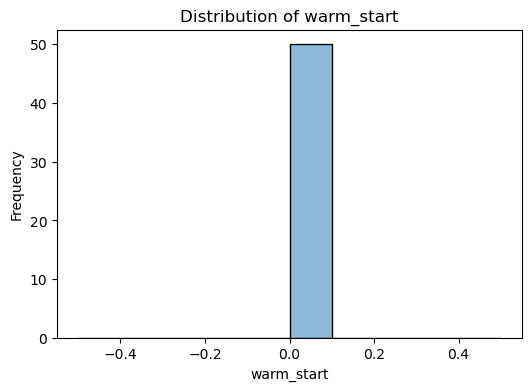

In [4]:
optuna_res = pd.read_csv(root/'data'/'best_model_results_GWO.csv', header=0)
utils = func_classes.Utils()
full_df = utils.process_optuna_results(optuna_res)
utils.plot_optuna_results(full_df)

Processing fold: 0
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 27)
Train set size: 264
Test set size: 65
-------------------------------------
Memory: 71.20 kB
Scaled: False
Outlier values: 83 (1.2%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9962
Test evaluation --> fbeta_score: 0.9385
Time elapsed: 0.013s
-------------------------------------------------
Time: 0.013s


Final results ==================== >>
Total time: 0.015s
-------------------------------------
LogisticRegression --> fbeta_score: 0.9385
Processing fold: 1
<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (329, 29)
Tra

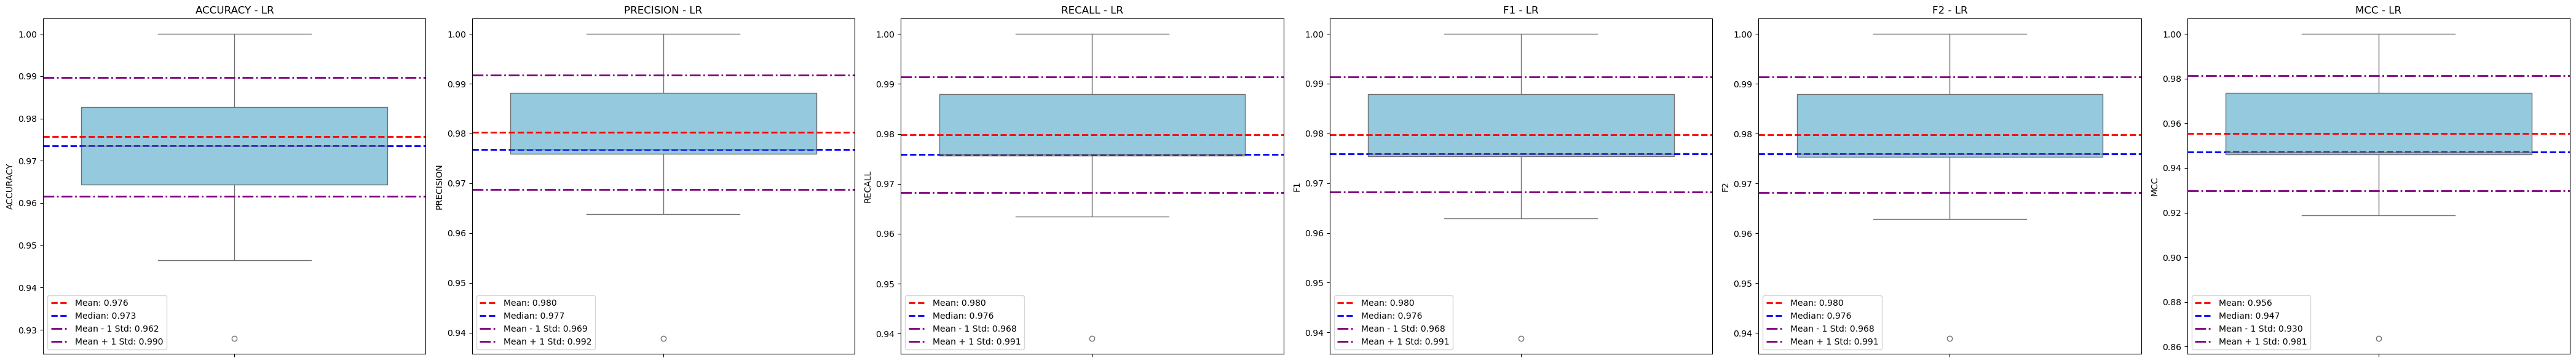

In [5]:
model = [LogisticRegression(C=0.5, penalty='l2', solver='liblinear')]
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=['diagnosis']), 
    y=train_df['diagnosis'], 
    models=model, 
    fs=True,
    fs_method=FeatureSelector(strategy="gwo", solver='GNB_class')
    )
rncv.baseline_run(model_inst=model)
final_model_results = rncv.get_baseline_results()
utils = func_classes.Utils()
utils.create_boxplot(
    df=final_model_results, 
    model_name="LR", 
    metrics=["accuracy", "precision", "recall", "f1", "f2", "mcc"]
)

<< ================== ATOM ================== >>

Configuration ==================== >>
Algorithm task: Binary classification.

Dataset stats ==================== >>
Shape: (412, 26)
Train set size: 330
Test set size: 82
-------------------------------------
Memory: 85.83 kB
Scaled: False
Outlier values: 106 (1.2%)


Training ========================= >>
Models: LR
Metric: fbeta_score


Results for LogisticRegression:
Fit ---------------------------------------------
Train evaluation --> fbeta_score: 0.9879
Test evaluation --> fbeta_score: 0.9754
Time elapsed: 0.013s
-------------------------------------------------
Time: 0.013s


Final results ==================== >>
Total time: 0.015s
-------------------------------------
LogisticRegression --> fbeta_score: 0.9754


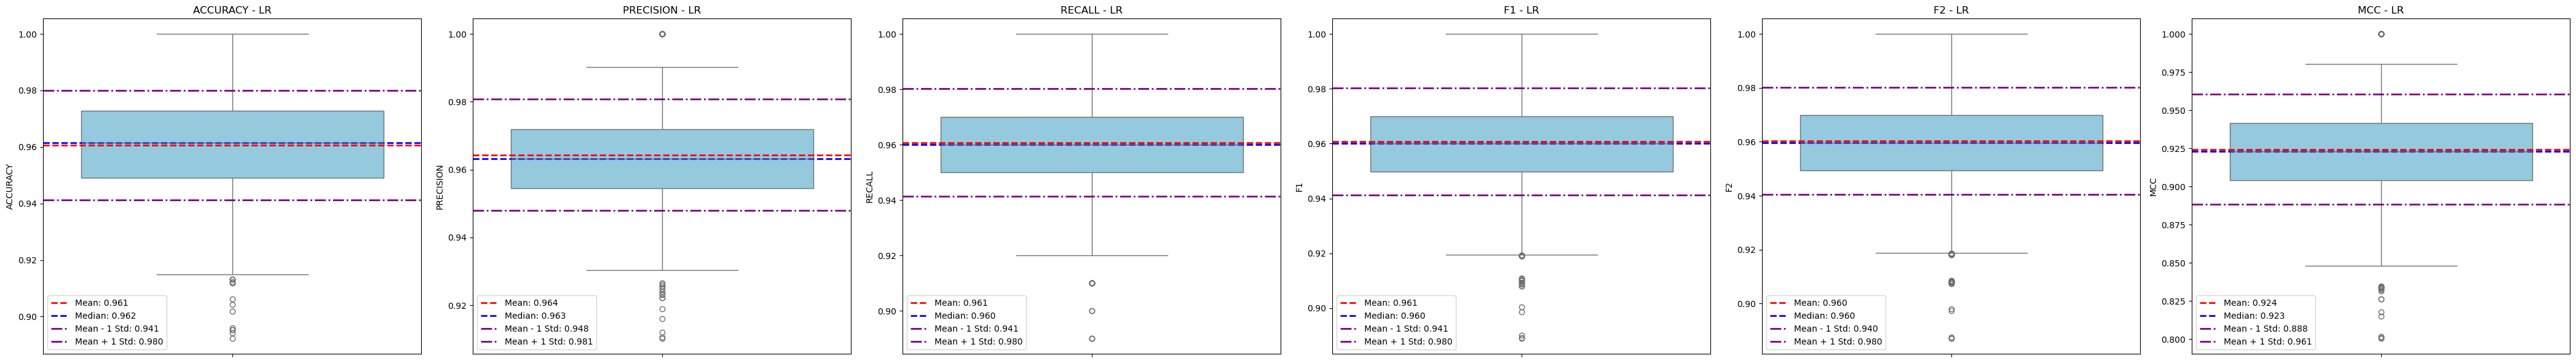

In [6]:
model = [LogisticRegression(C=0.5, penalty='l2', solver='liblinear')]
rncv = func_classes.RNcvAtom(
    X=train_df.drop(columns=['diagnosis']), 
    y=train_df['diagnosis'], 
    models=model, 
    fs=True,
    fs_method=FeatureSelector(strategy="gwo", solver="GNB_class"),
    )
rncv.bootstrap(
    train_set=train_df,
    eval_set=test_df,
    model_inst=model,
)
boot_df = rncv.get_bootstrap_results()
utils = func_classes.Utils()
utils.create_boxplot(
    df=boot_df,
    model_name="LR",
    metrics=["accuracy", "precision", "recall", "f1", "f2", "mcc"]
)